# 데이콘 심리성향 예측 대회

# 01 데이터 로드

In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('open data/train.csv', index_col=0)
test=pd.read_csv('open data/test_x.csv', index_col=0)
submission=pd.read_csv('open data/sample_submission.csv', index_col=0)  

In [3]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,1,0,1,1,0,1,0,1,1


In [4]:
train.shape

(45532, 77)

In [5]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [6]:
train.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,...,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,...,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,...,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,5.570000e+02,3.000000,1.218000e+03,4.000000,899.000000,1.000000,9.310000e+02,2.000000,1.154000e+03,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,3.000000,8.270000e+02,4.000000,1.838000e+03,5.000000,1335.000000,2.000000,1.355000e+03,3.000000,1.656000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,2.413960e+06,5.000000,5.580395e+06,5.000000,871557.000000,5.000000,1.552821e+06,5.000000,1.919926e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


index

* Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
* Qa : Secret
* Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
* Qc : Anyone who completely trusts anyone else is asking for trouble.
* Qd : Secret
* Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
* Qf : There is no excuse for lying to someone else.
* Qg : Secret
* Qh : Most people forget more easily the death of their parents than the loss of their property.
* Qi : Secret
* Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
* Qk : All in all, it is better to be humble and honest than to be important and dishonest.
* Ql : Secret
* Qm : It is hard to get ahead without cutting corners here and there.
* Qn : Secret
* Qo : The best way to handle people is to tell them what they want to hear.
* Qp : Secret
* Qq : Most people are basically good and kind.
* Qr : One should take action only when sure it is morally right.
* Qs : It is wise to flatter important people.
* Qt : Secret

(1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.)



Q_E(a~t) : 질문을 답할 때까지의 시간


age_group : 연령


education : 교육 수준
- 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


engnat : 모국어가 영어
- 1=Yes, 2=No, 0=무응답


familysize : 형제자매 수


gender : 성별
- Male, Female


hand : 필기하는 손
- 1=Right, 2=Left, 3=Both, 0=무응답


married : 혼인 상태
- 1=Never married, 2=Currently married, 3=Previously married, 0=Other


race : 인종
- Asian, Arab, Black, Indigenous Australian, Native American, White, Other


religion : 종교
- Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


tp__(01~07) : items were rated "I see myself as:" _____ such that
tp01 : Extraverted, enthusiastic.
tp02 : Critical, quarrelsome.
tp03 : Dependable, self-disciplined.
tp04 : Anxious, easily upset.
tp05 : Open to new experiences, complex.
tp06 : Reserved, quiet.
tp07 : Sympathetic, warm.
tp08 : Disorganized, careless.
tp09 : Calm, emotionally stable.
tp10 : Conventional, uncreative.
								

순서형 변수

							



urban : 유년기의 거주 구역
- 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답




wr_(01~13) : 실존하는 해당 단어의 정의을 앎
- 1=Yes, 0=No
wf_(01~03) : 허구인 단어의 정의를 앎
- 1=Yes, 0=No


- voted (타겟): 지난 해 국가 선거 투표 여부
1=Yes, 2=No


In [7]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [8]:
train['voted']

index
0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [9]:
X = train.drop('voted', axis = 1)
y = train['voted']

학습데이터와 테스트데이터를 분류한 후 인코딩을 진행하겠습니다.

---

# EDA

In [10]:
data_tr=train.copy()
data_te=test.copy()

먼저 성진이가 만든 변수들을 추가해주었다.

<AxesSubplot:xlabel='QaA', ylabel='count'>

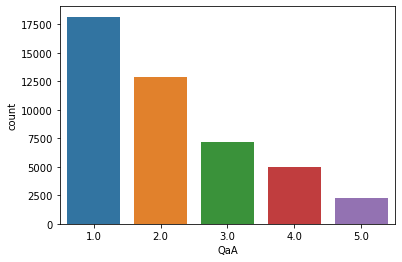

In [11]:
sns.countplot('QaA',data=data_tr)

In [12]:
for i in ["QaA", "QdA", "QgA", "QiA", "QnA"]:
    data_tr[i] = 6 - data_tr[i]
    data_te[i] = 6 - data_te[i]

<AxesSubplot:xlabel='QaA', ylabel='count'>

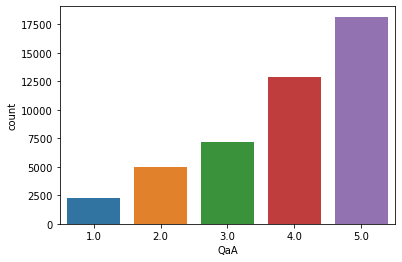

In [13]:
sns.countplot('QaA',data=data_tr)

In [14]:
data_tr['Machiavelli Score'] = data_tr[ ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']].mean(axis=1)

In [15]:
data_te['Machiavelli Score'] = data_te[ ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']].mean(axis=1)

In [16]:
data_tr['wf_sum'] = data_tr['wf_01'] + data_tr['wf_02'] + data_tr['wf_03']
data_tr['wr_sum'] = data_tr['wr_01'] + data_tr['wr_02'] + data_tr['wr_03'] + data_tr['wr_04'] + data_tr['wr_05'] + data_tr['wr_06'] + data_tr['wr_07'] + data_tr['wr_08'] + data_tr['wr_09'] + data_tr['wr_10'] + data_tr['wr_11'] + data_tr['wr_12'] + data_tr['wr_13']
data_tr['wfr_sum'] = data_tr['wf_sum'] + data_tr['wr_sum']
data_tr['wfr_minus'] = data_tr['wf_sum'] - data_tr['wr_sum']

In [17]:
data_te['wf_sum'] = data_te['wf_01'] + data_te['wf_02'] + data_te['wf_03']
data_te['wr_sum'] = data_te['wr_01'] + data_te['wr_02'] + data_te['wr_03'] + data_te['wr_04'] + data_te['wr_05'] + data_te['wr_06'] + data_te['wr_07'] + data_te['wr_08'] + data_te['wr_09'] + data_te['wr_10'] + data_te['wr_11'] + data_te['wr_12'] + data_te['wr_13']
data_te['wfr_sum'] = data_te['wf_sum'] + data_te['wr_sum']
data_te['wfr_minus'] = data_te['wf_sum'] - data_te['wr_sum']

<AxesSubplot:xlabel='tp01', ylabel='count'>

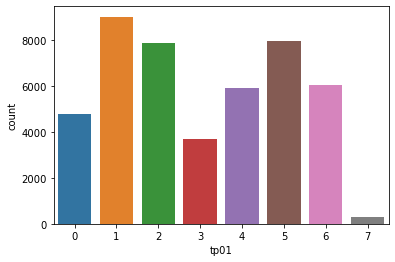

In [18]:
sns.countplot('tp01',data=data_tr)

<AxesSubplot:xlabel='tp02', ylabel='count'>

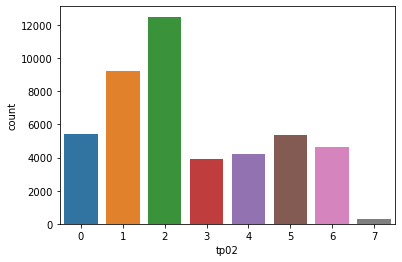

In [19]:
sns.countplot('tp02',data=data_tr)

In [20]:
data_tr['tp01'] = 7 - data_tr['tp01']
data_tr['tp02'] = 7 - data_tr['tp02']
data_tr['tp03'] = 7 - data_tr['tp03']
data_tr['tp04'] = 7 - data_tr['tp04']
data_tr['tp05'] = 7 - data_tr['tp05']
data_tr['tp06'] = 7 - data_tr['tp06']
data_tr['tp07'] = 7 - data_tr['tp07']
data_tr['tp08'] = 7 - data_tr['tp08']
data_tr['tp09'] = 7 - data_tr['tp09']
data_tr['tp10'] = 7 - data_tr['tp10']

In [21]:
data_te['tp01'] = 7 - data_te['tp01']
data_te['tp02'] = 7 - data_te['tp02']
data_te['tp03'] = 7 - data_te['tp03']
data_te['tp04'] = 7 - data_te['tp04']
data_te['tp05'] = 7 - data_te['tp05']
data_te['tp06'] = 7 - data_te['tp06']
data_te['tp07'] = 7 - data_te['tp07']
data_te['tp08'] = 7 - data_te['tp08']
data_te['tp09'] = 7 - data_te['tp09']
data_te['tp10'] = 7 - data_te['tp10']

<AxesSubplot:xlabel='tp01', ylabel='count'>

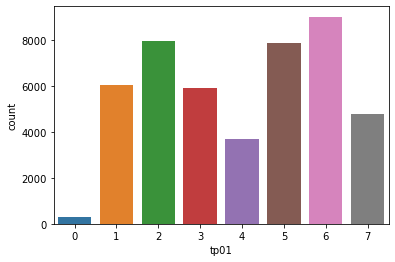

In [22]:
sns.countplot('tp01',data=data_tr)

<AxesSubplot:xlabel='tp02', ylabel='count'>

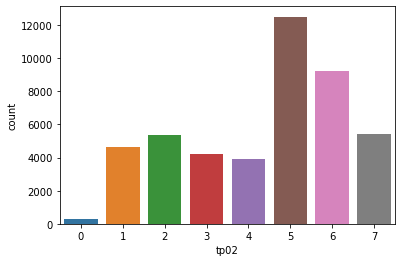

In [23]:
sns.countplot('tp02',data=data_tr)

In [24]:
data_tr.tp01.value_counts()

6    9014
2    7942
5    7877
1    6041
3    5900
7    4783
4    3692
0     283
Name: tp01, dtype: int64

In [25]:
data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 1)] = data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 1)].replace({'tp01':0},{'tp01':1})
data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 2)] = data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 2)].replace({'tp01':0},{'tp01':2})
data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 3)] = data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 3)].replace({'tp01':0},{'tp01':3})
data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 4)] = data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 4)].replace({'tp01':0},{'tp01':4})
data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 5)] = data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 5)].replace({'tp01':0},{'tp01':5})
data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 6)] = data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 6)].replace({'tp01':0},{'tp01':6})
data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 7)] = data_tr[(data_tr['tp01'] == 0) & (data_tr['tp06'] == 7)].replace({'tp01':0},{'tp01':7})

data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 1)] = data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 1)].replace({'tp02':0},{'tp02':1})
data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 2)] = data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 2)].replace({'tp02':0},{'tp02':2})
data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 3)] = data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 3)].replace({'tp02':0},{'tp02':3})
data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 4)] = data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 4)].replace({'tp02':0},{'tp02':4})
data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 5)] = data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 5)].replace({'tp02':0},{'tp02':5})
data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 6)] = data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 6)].replace({'tp02':0},{'tp02':6})
data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 7)] = data_tr[(data_tr['tp02'] == 0) & (data_tr['tp07'] == 7)].replace({'tp02':0},{'tp02':7})

data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 1)] = data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 1)].replace({'tp03':0},{'tp03':1})
data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 2)] = data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 2)].replace({'tp03':0},{'tp03':2})
data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 3)] = data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 3)].replace({'tp03':0},{'tp03':3})
data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 4)] = data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 4)].replace({'tp03':0},{'tp03':4})
data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 5)] = data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 5)].replace({'tp03':0},{'tp03':5})
data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 6)] = data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 6)].replace({'tp03':0},{'tp03':6})
data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 7)] = data_tr[(data_tr['tp03'] == 0) & (data_tr['tp08'] == 7)].replace({'tp03':0},{'tp03':7})

data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 1)] = data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 1)].replace({'tp05':0},{'tp05':1})
data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 2)] = data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 2)].replace({'tp05':0},{'tp05':2})
data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 3)] = data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 3)].replace({'tp05':0},{'tp05':3})
data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 4)] = data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 4)].replace({'tp05':0},{'tp05':4})
data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 5)] = data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 5)].replace({'tp05':0},{'tp05':5})
data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 6)] = data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 6)].replace({'tp05':0},{'tp05':6})
data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 7)] = data_tr[(data_tr['tp05'] == 0) & (data_tr['tp10'] == 7)].replace({'tp05':0},{'tp05':7})

data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 1)] = data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 1)].replace({'tp06':0},{'tp06':1})
data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 2)] = data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 2)].replace({'tp06':0},{'tp06':2})
data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 3)] = data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 3)].replace({'tp06':0},{'tp06':3})
data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 4)] = data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 4)].replace({'tp06':0},{'tp06':4})
data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 5)] = data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 5)].replace({'tp06':0},{'tp06':5})
data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 6)] = data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 6)].replace({'tp06':0},{'tp06':6})
data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 7)] = data_tr[(data_tr['tp06'] == 0) & (data_tr['tp01'] == 7)].replace({'tp06':0},{'tp06':7})

data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 1)] = data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 1)].replace({'tp07':0},{'tp07':1})
data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 2)] = data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 2)].replace({'tp07':0},{'tp07':2})
data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 3)] = data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 3)].replace({'tp07':0},{'tp07':3})
data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 4)] = data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 4)].replace({'tp07':0},{'tp07':4})
data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 5)] = data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 5)].replace({'tp07':0},{'tp07':5})
data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 6)] = data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 6)].replace({'tp07':0},{'tp07':6})
data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 7)] = data_tr[(data_tr['tp07'] == 0) & (data_tr['tp02'] == 7)].replace({'tp07':0},{'tp07':7})

data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 1)] = data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 1)].replace({'tp08':0},{'tp08':1})
data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 2)] = data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 2)].replace({'tp08':0},{'tp08':2})
data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 3)] = data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 3)].replace({'tp08':0},{'tp08':3})
data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 4)] = data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 4)].replace({'tp08':0},{'tp08':4})
data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 5)] = data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 5)].replace({'tp08':0},{'tp08':5})
data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 6)] = data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 6)].replace({'tp08':0},{'tp08':6})
data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 7)] = data_tr[(data_tr['tp08'] == 0) & (data_tr['tp03'] == 7)].replace({'tp08':0},{'tp08':7})

data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 1)] = data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 1)].replace({'tp09':0},{'tp09':1})
data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 2)] = data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 2)].replace({'tp09':0},{'tp09':2})
data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 3)] = data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 3)].replace({'tp09':0},{'tp09':3})
data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 4)] = data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 4)].replace({'tp09':0},{'tp09':4})
data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 5)] = data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 5)].replace({'tp09':0},{'tp09':5})
data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 6)] = data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 6)].replace({'tp09':0},{'tp09':6})
data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 7)] = data_tr[(data_tr['tp09'] == 0) & (data_tr['tp04'] == 7)].replace({'tp09':0},{'tp09':7})

data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 1)] = data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 1)].replace({'tp10':0},{'tp10':1})
data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 2)] = data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 2)].replace({'tp10':0},{'tp10':2})
data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 3)] = data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 3)].replace({'tp10':0},{'tp10':3})
data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 4)] = data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 4)].replace({'tp10':0},{'tp10':4})
data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 5)] = data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 5)].replace({'tp10':0},{'tp10':5})
data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 6)] = data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 6)].replace({'tp10':0},{'tp10':6})
data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 7)] = data_tr[(data_tr['tp10'] == 0) & (data_tr['tp05'] == 7)].replace({'tp10':0},{'tp10':7})

In [26]:
data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 1)] = data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 1)].replace({'tp01':0},{'tp01':1})
data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 2)] = data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 2)].replace({'tp01':0},{'tp01':2})
data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 3)] = data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 3)].replace({'tp01':0},{'tp01':3})
data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 4)] = data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 4)].replace({'tp01':0},{'tp01':4})
data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 5)] = data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 5)].replace({'tp01':0},{'tp01':5})
data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 6)] = data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 6)].replace({'tp01':0},{'tp01':6})
data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 7)] = data_te[(data_te['tp01'] == 0) & (data_te['tp06'] == 7)].replace({'tp01':0},{'tp01':7})

data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 1)] = data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 1)].replace({'tp02':0},{'tp02':1})
data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 2)] = data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 2)].replace({'tp02':0},{'tp02':2})
data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 3)] = data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 3)].replace({'tp02':0},{'tp02':3})
data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 4)] = data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 4)].replace({'tp02':0},{'tp02':4})
data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 5)] = data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 5)].replace({'tp02':0},{'tp02':5})
data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 6)] = data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 6)].replace({'tp02':0},{'tp02':6})
data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 7)] = data_te[(data_te['tp02'] == 0) & (data_te['tp07'] == 7)].replace({'tp02':0},{'tp02':7})

data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 1)] = data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 1)].replace({'tp03':0},{'tp03':1})
data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 2)] = data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 2)].replace({'tp03':0},{'tp03':2})
data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 3)] = data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 3)].replace({'tp03':0},{'tp03':3})
data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 4)] = data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 4)].replace({'tp03':0},{'tp03':4})
data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 5)] = data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 5)].replace({'tp03':0},{'tp03':5})
data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 6)] = data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 6)].replace({'tp03':0},{'tp03':6})
data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 7)] = data_te[(data_te['tp03'] == 0) & (data_te['tp08'] == 7)].replace({'tp03':0},{'tp03':7})

data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 1)] = data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 1)].replace({'tp05':0},{'tp05':1})
data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 2)] = data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 2)].replace({'tp05':0},{'tp05':2})
data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 3)] = data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 3)].replace({'tp05':0},{'tp05':3})
data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 4)] = data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 4)].replace({'tp05':0},{'tp05':4})
data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 5)] = data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 5)].replace({'tp05':0},{'tp05':5})
data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 6)] = data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 6)].replace({'tp05':0},{'tp05':6})
data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 7)] = data_te[(data_te['tp05'] == 0) & (data_te['tp10'] == 7)].replace({'tp05':0},{'tp05':7})

data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 1)] = data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 1)].replace({'tp06':0},{'tp06':1})
data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 2)] = data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 2)].replace({'tp06':0},{'tp06':2})
data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 3)] = data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 3)].replace({'tp06':0},{'tp06':3})
data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 4)] = data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 4)].replace({'tp06':0},{'tp06':4})
data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 5)] = data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 5)].replace({'tp06':0},{'tp06':5})
data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 6)] = data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 6)].replace({'tp06':0},{'tp06':6})
data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 7)] = data_te[(data_te['tp06'] == 0) & (data_te['tp01'] == 7)].replace({'tp06':0},{'tp06':7})

data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 1)] = data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 1)].replace({'tp07':0},{'tp07':1})
data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 2)] = data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 2)].replace({'tp07':0},{'tp07':2})
data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 3)] = data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 3)].replace({'tp07':0},{'tp07':3})
data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 4)] = data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 4)].replace({'tp07':0},{'tp07':4})
data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 5)] = data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 5)].replace({'tp07':0},{'tp07':5})
data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 6)] = data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 6)].replace({'tp07':0},{'tp07':6})
data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 7)] = data_te[(data_te['tp07'] == 0) & (data_te['tp02'] == 7)].replace({'tp07':0},{'tp07':7})

data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 1)] = data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 1)].replace({'tp08':0},{'tp08':1})
data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 2)] = data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 2)].replace({'tp08':0},{'tp08':2})
data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 3)] = data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 3)].replace({'tp08':0},{'tp08':3})
data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 4)] = data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 4)].replace({'tp08':0},{'tp08':4})
data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 5)] = data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 5)].replace({'tp08':0},{'tp08':5})
data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 6)] = data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 6)].replace({'tp08':0},{'tp08':6})
data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 7)] = data_te[(data_te['tp08'] == 0) & (data_te['tp03'] == 7)].replace({'tp08':0},{'tp08':7})

data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 1)] = data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 1)].replace({'tp09':0},{'tp09':1})
data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 2)] = data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 2)].replace({'tp09':0},{'tp09':2})
data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 3)] = data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 3)].replace({'tp09':0},{'tp09':3})
data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 4)] = data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 4)].replace({'tp09':0},{'tp09':4})
data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 5)] = data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 5)].replace({'tp09':0},{'tp09':5})
data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 6)] = data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 6)].replace({'tp09':0},{'tp09':6})
data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 7)] = data_te[(data_te['tp09'] == 0) & (data_te['tp04'] == 7)].replace({'tp09':0},{'tp09':7})

data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 1)] = data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 1)].replace({'tp10':0},{'tp10':1})
data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 2)] = data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 2)].replace({'tp10':0},{'tp10':2})
data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 3)] = data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 3)].replace({'tp10':0},{'tp10':3})
data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 4)] = data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 4)].replace({'tp10':0},{'tp10':4})
data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 5)] = data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 5)].replace({'tp10':0},{'tp10':5})
data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 6)] = data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 6)].replace({'tp10':0},{'tp10':6})
data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 7)] = data_te[(data_te['tp10'] == 0) & (data_te['tp05'] == 7)].replace({'tp10':0},{'tp10':7})

In [27]:
ss=data_tr.corr()[['tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10']]

In [28]:
print(ss.sort_values(by='tp01', ascending = False)[1:3])
print(ss.sort_values(by='tp02', ascending = False)[1:3])
print(ss.sort_values(by='tp03', ascending = False)[1:3])
print(ss.sort_values(by='tp04', ascending = False)[1:3])
print(ss.sort_values(by='tp05', ascending = False)[1:3])
print(ss.sort_values(by='tp06', ascending = False)[1:3])
print(ss.sort_values(by='tp07', ascending = False)[1:3])
print(ss.sort_values(by='tp08', ascending = False)[1:3])
print(ss.sort_values(by='tp09', ascending = False)[1:3])
print(ss.sort_values(by='tp10', ascending = False)[1:3])

          tp01      tp02      tp03      tp04      tp05      tp06      tp07  \
tp05  0.278160  0.003565  0.119730 -0.111423  1.000000 -0.106993  0.159815   
tp07  0.221356 -0.250643  0.094085  0.129728  0.159815 -0.042560  1.000000   

          tp08      tp09      tp10  
tp05  0.030685  0.159209 -0.204588  
tp07 -0.007638  0.048703 -0.054265  
                       tp01      tp02      tp03      tp04      tp05      tp06  \
Machiavelli Score -0.074698  0.269926 -0.064557  0.002097 -0.021616  0.061571   
QjA               -0.057990  0.232315 -0.033357  0.033832 -0.015585  0.064506   

                       tp07      tp08      tp09      tp10  
Machiavelli Score -0.338780  0.098287 -0.043270  0.011369  
QjA               -0.245328  0.063592 -0.053047  0.003884  
          tp01      tp02     tp03      tp04      tp05      tp06      tp07  \
tp09  0.093535 -0.140624  0.29907 -0.499020  0.159209  0.079527  0.048703   
tp05  0.278160  0.003565  0.11973 -0.111423  1.000000 -0.106993  0.159815   

In [29]:
print(ss.sort_values(by='tp01', ascending = True)[0:3])
print(ss.sort_values(by='tp02', ascending = True)[0:3])
print(ss.sort_values(by='tp03', ascending = True)[0:3])
print(ss.sort_values(by='tp04', ascending = True)[0:3])
print(ss.sort_values(by='tp05', ascending = True)[0:3])
print(ss.sort_values(by='tp06', ascending = True)[0:3])
print(ss.sort_values(by='tp07', ascending = True)[0:3])
print(ss.sort_values(by='tp08', ascending = True)[0:3])
print(ss.sort_values(by='tp09', ascending = True)[0:3])
print(ss.sort_values(by='tp10', ascending = True)[0:3])

          tp01      tp02      tp03      tp04      tp05      tp06      tp07  \
tp06 -0.531488 -0.020805  0.044055  0.130103 -0.106993  1.000000 -0.042560   
tp10 -0.126090  0.028425 -0.001632  0.063598 -0.204588  0.134819 -0.054265   
tp04 -0.117201  0.150081 -0.132848  1.000000 -0.111423  0.130103  0.129728   

          tp08      tp09      tp10  
tp06  0.029792  0.079527  0.134819  
tp10  0.031408  0.037547  1.000000  
tp04  0.195328 -0.499020  0.063598  
          tp01      tp02      tp03      tp04      tp05      tp06      tp07  \
tp07  0.221356 -0.250643  0.094085  0.129728  0.159815 -0.042560  1.000000   
QkA   0.033224 -0.239928  0.077139  0.085790  0.009810  0.012943  0.394278   
QqA   0.109620 -0.229347  0.058371 -0.017116  0.049986 -0.044494  0.330438   

          tp08      tp09      tp10  
tp07 -0.007638  0.048703 -0.054265  
QkA  -0.073103  0.004209  0.011957  
QqA  -0.048296  0.082283  0.014378  
          tp01      tp02      tp03      tp04      tp05      tp06      tp07  \


tipi점수에 의해 같은 경향성을 나타내는 점수는 동일한 값을 부여하였다.

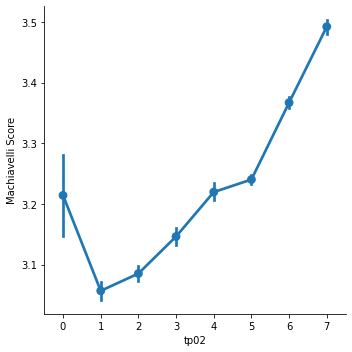

In [30]:
sns.factorplot('tp02','Machiavelli Score',data=data_tr)
plt.show()

전반적으로 tp02가 높아질수록 Machiavelli Score도 높아진다. 하지만 그 범위가 좁아 어떻다라고 말하기 어렵다. 그냥 이 성격을 나타내는 tp값의 결측치는 척도의 중간인 4로 부여하여 해당 지표에 큰 영향이 없도록 만든다

In [31]:
data_tr[(data_tr['tp01'] == 0)] = data_tr[(data_tr['tp01'] == 0)].replace({'tp01':0},{'tp01':4})
data_tr[(data_tr['tp02'] == 0)] = data_tr[(data_tr['tp02'] == 0)].replace({'tp02':0},{'tp02':4})
data_tr[(data_tr['tp03'] == 0)] = data_tr[(data_tr['tp03'] == 0)].replace({'tp03':0},{'tp03':4})
data_tr[(data_tr['tp04'] == 0)] = data_tr[(data_tr['tp04'] == 0)].replace({'tp04':0},{'tp04':4})
data_tr[(data_tr['tp05'] == 0)] = data_tr[(data_tr['tp05'] == 0)].replace({'tp05':0},{'tp05':4})
data_tr[(data_tr['tp06'] == 0)] = data_tr[(data_tr['tp06'] == 0)].replace({'tp06':0},{'tp06':4})
data_tr[(data_tr['tp07'] == 0)] = data_tr[(data_tr['tp07'] == 0)].replace({'tp07':0},{'tp07':4})
data_tr[(data_tr['tp08'] == 0)] = data_tr[(data_tr['tp08'] == 0)].replace({'tp08':0},{'tp08':4})
data_tr[(data_tr['tp09'] == 0)] = data_tr[(data_tr['tp09'] == 0)].replace({'tp09':0},{'tp09':4})
data_tr[(data_tr['tp10'] == 0)] = data_tr[(data_tr['tp10'] == 0)].replace({'tp10':0},{'tp10':4})

In [32]:
data_te[(data_te['tp01'] == 0)] = data_te[(data_te['tp01'] == 0)].replace({'tp01':0},{'tp01':4})
data_te[(data_te['tp02'] == 0)] = data_te[(data_te['tp02'] == 0)].replace({'tp02':0},{'tp02':4})
data_te[(data_te['tp03'] == 0)] = data_te[(data_te['tp03'] == 0)].replace({'tp03':0},{'tp03':4})
data_te[(data_te['tp04'] == 0)] = data_te[(data_te['tp04'] == 0)].replace({'tp04':0},{'tp04':4})
data_te[(data_te['tp05'] == 0)] = data_te[(data_te['tp05'] == 0)].replace({'tp05':0},{'tp05':4})
data_te[(data_te['tp06'] == 0)] = data_te[(data_te['tp06'] == 0)].replace({'tp06':0},{'tp06':4})
data_te[(data_te['tp07'] == 0)] = data_te[(data_te['tp07'] == 0)].replace({'tp07':0},{'tp07':4})
data_te[(data_te['tp08'] == 0)] = data_te[(data_te['tp08'] == 0)].replace({'tp08':0},{'tp08':4})
data_te[(data_te['tp09'] == 0)] = data_te[(data_te['tp09'] == 0)].replace({'tp09':0},{'tp09':4})
data_te[(data_te['tp10'] == 0)] = data_te[(data_te['tp10'] == 0)].replace({'tp10':0},{'tp10':4})

In [33]:
data_tr['tp_Sincerity'] = ( data_tr['tp03'] + 8 - data_tr['tp08'] ) / 2
data_tr['tp_Affinity'] = ( data_tr['tp07'] + 8 - data_tr['tp02'] ) / 2
data_tr['tp_Emotional Stability'] = ( data_tr['tp09'] + 8 - data_tr['tp04'] ) / 2
data_tr['tp_Experience Openess'] = ( data_tr['tp05'] + 8 - data_tr['tp10'] ) / 2
data_tr['tp_Extrovertness'] = ( data_tr['tp01'] + 8 - data_tr['tp06'] ) / 2

In [34]:
data_te['tp_Sincerity'] = ( data_te['tp03'] + 8 - data_te['tp08'] ) / 2
data_te['tp_Affinity'] = ( data_te['tp07'] + 8 - data_te['tp02'] ) / 2
data_te['tp_Emotional Stability'] = ( data_te['tp09'] + 8 - data_te['tp04'] ) / 2
data_te['tp_Experience Openess'] = ( data_te['tp05'] + 8 - data_te['tp10'] ) / 2
data_te['tp_Extrovertness'] = ( data_te['tp01'] + 8 - data_te['tp06'] ) / 2

In [35]:
data_tr['education'].value_counts()

2    16835
3    15227
4     7854
1     5088
0      528
Name: education, dtype: int64

In [36]:
data_tr['engnat'].value_counts()

1    33024
2    12431
0       77
Name: engnat, dtype: int64

In [37]:
data_tr['hand'].value_counts()

1    39058
2     4692
3     1621
0      161
Name: hand, dtype: int64

In [38]:
data_tr['married'].value_counts()

1    31550
2    10059
3     3830
0       93
Name: married, dtype: int64

In [39]:
data_tr['race'].value_counts()

White                    31248
Asian                     6834
Other                     4330
Black                     2168
Native American            548
Arab                       351
Indigenous Australian       53
Name: race, dtype: int64

In [40]:
data_tr['religion'].value_counts()

Atheist                 10192
Agnostic                 9624
Christian_Catholic       6431
Christian_Other          5137
Christian_Protestant     4875
Other                    4770
Hindu                    1429
Muslim                   1192
Buddhist                  850
Jewish                    487
Christian_Mormon          428
Sikh                      117
Name: religion, dtype: int64

In [41]:
data_tr['urban'].value_counts()

2    18534
3    17767
1     8909
0      322
Name: urban, dtype: int64

In [42]:
time_tr = data_tr[['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']]

In [43]:
time_te = data_te[['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']]

In [44]:
time_tr.describe()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
count,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04
mean,9.453570e+02,2.189589e+03,1484.294518,1.490672e+03,1.899292e+03,1.850650e+03,1.284608e+03,4.584272e+03,4.068434e+03,2.576363e+03,2.038986e+03,3.741018e+03,2.050287e+03,959.880502,1.435762e+03,1.633479e+03,1.154352e+03,2.470808e+03,1.164117e+03,2.240057e+03
std,1.307565e+04,3.351027e+04,8977.664318,1.092260e+04,1.670765e+04,7.608236e+04,9.756584e+03,5.020265e+05,1.141738e+05,5.411432e+04,3.069164e+04,3.663672e+05,7.530787e+04,5869.964127,1.084997e+04,2.600221e+04,2.250689e+04,1.482890e+05,7.433515e+03,6.730924e+04
min,2.500000e+01,2.500000e+01,25.000000,2.600000e+01,2.500000e+01,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,25.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,2.500000e+01
25%,4.040000e+02,8.750000e+02,651.000000,6.790000e+02,8.340000e+02,5.040000e+02,5.490000e+02,1.077000e+03,1.259000e+03,9.020000e+02,8.590000e+02,8.060000e+02,6.500000e+02,428.000000,6.380000e+02,7.060000e+02,4.610000e+02,7.940000e+02,5.270000e+02,7.330000e+02
50%,5.570000e+02,1.218000e+03,899.000000,9.310000e+02,1.154000e+03,7.120000e+02,7.720000e+02,1.464000e+03,1.800000e+03,1.260000e+03,1.178000e+03,1.125000e+03,9.060000e+02,596.000000,8.830000e+02,9.700000e+02,6.520000e+02,1.117000e+03,7.470000e+02,1.020000e+03
75%,8.270000e+02,1.838000e+03,1335.000000,1.355000e+03,1.656000e+03,1.078000e+03,1.150000e+03,2.090000e+03,2.761000e+03,1.899000e+03,1.721000e+03,1.649000e+03,1.342000e+03,891.000000,1.300000e+03,1.409000e+03,9.820000e+02,1.664000e+03,1.124000e+03,1.526000e+03
max,2.413960e+06,5.580395e+06,871557.000000,1.552821e+06,1.919926e+06,1.176370e+07,1.068252e+06,1.070860e+08,1.703586e+07,9.910006e+06,4.824953e+06,7.754351e+07,1.410832e+07,606694.000000,1.309739e+06,4.650742e+06,4.277510e+06,3.159328e+07,1.286581e+06,1.155650e+07


In [45]:
time_te.describe()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
count,11383.000000,1.138300e+04,1.138300e+04,1.138300e+04,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,1.138300e+04,1.138300e+04,1.138300e+04,11383.000000,11383.000000,1.138300e+04,1.138300e+04,1.138300e+04,1.138300e+04,11383.000000,1.138300e+04
mean,825.556268,2.375705e+03,4.627016e+03,1.573476e+03,1.908333e+03,1261.964069,1.503954e+03,2023.762365,4.501748e+03,2.626536e+03,2.463975e+03,1.971527e+03,1449.079505,905.620135,1.695724e+03,1.705669e+03,1.135987e+03,2.715532e+03,1299.238953,1.709446e+03
std,2450.121716,5.109158e+04,3.404012e+05,1.932751e+04,1.647452e+04,9516.116563,1.969331e+04,4494.374430,1.258543e+05,3.628162e+04,5.730667e+04,2.108026e+04,5795.989823,3159.081388,2.292899e+04,1.699703e+04,1.450249e+04,8.391658e+04,11021.057030,1.394429e+04
min,26.000000,2.900000e+01,2.700000e+01,2.800000e+01,2.900000e+01,0.000000,2.700000e+01,26.000000,3.400000e+01,2.600000e+01,2.500000e+01,2.800000e+01,0.000000,25.000000,2.700000e+01,2.800000e+01,2.500000e+01,3.200000e+01,25.000000,2.700000e+01
25%,403.000000,8.830000e+02,6.560000e+02,6.710000e+02,8.300000e+02,504.000000,5.500000e+02,1087.000000,1.249500e+03,8.900000e+02,8.630000e+02,8.050000e+02,658.000000,430.000000,6.350000e+02,7.030000e+02,4.630000e+02,7.930000e+02,533.000000,7.370000e+02
50%,559.000000,1.226000e+03,9.010000e+02,9.230000e+02,1.149000e+03,709.000000,7.780000e+02,1466.000000,1.795000e+03,1.252000e+03,1.185000e+03,1.124000e+03,916.000000,595.000000,8.840000e+02,9.650000e+02,6.530000e+02,1.113000e+03,759.000000,1.021000e+03
75%,828.000000,1.815000e+03,1.335500e+03,1.359000e+03,1.649000e+03,1066.500000,1.149000e+03,2086.000000,2.714000e+03,1.888000e+03,1.721000e+03,1.645000e+03,1347.000000,888.500000,1.308000e+03,1.428000e+03,9.810000e+02,1.664000e+03,1125.000000,1.528000e+03
max,150104.000000,5.381662e+06,3.630804e+07,1.976418e+06,1.580136e+06,776322.000000,1.324128e+06,266767.000000,9.631307e+06,3.308343e+06,5.855026e+06,1.962603e+06,361544.000000,215582.000000,2.135423e+06,1.265333e+06,1.470200e+06,8.416990e+06,884242.000000,1.315972e+06


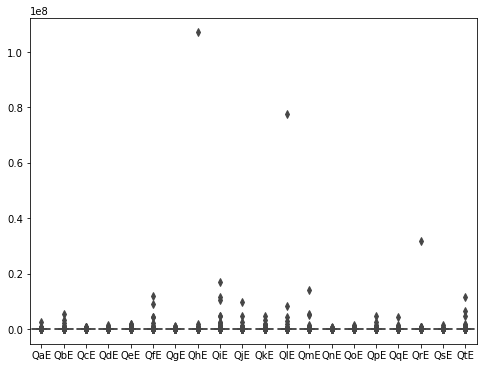

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=time_tr)

In [47]:
data_tr.sort_values(by = 'QaE', ascending = False)['QaE'][:10]

index
37223    2413960
3290      697050
11334     599190
33039     571768
13638     497807
9289      403981
39043     255513
26196     203755
18999     189789
22505     183397
Name: QaE, dtype: int64

In [48]:
print(data_te.sort_values(by = 'QaE', ascending = False)['QaE'][:2])
print(data_te.sort_values(by = 'QbE', ascending = False)['QbE'][:2])
print(data_te.sort_values(by = 'QcE', ascending = False)['QcE'][:2])
print(data_te.sort_values(by = 'QdE', ascending = False)['QdE'][:2])
print(data_te.sort_values(by = 'QeE', ascending = False)['QeE'][:2])
print(data_te.sort_values(by = 'QfE', ascending = False)['QfE'][:2])
print(data_te.sort_values(by = 'QgE', ascending = False)['QgE'][:2])
print(data_te.sort_values(by = 'QhE', ascending = False)['QhE'][:2])
print(data_te.sort_values(by = 'QiE', ascending = False)['QiE'][:2])
print(data_te.sort_values(by = 'QjE', ascending = False)['QjE'][:2])
print(data_te.sort_values(by = 'QkE', ascending = False)['QkE'][:2])
print(data_te.sort_values(by = 'QlE', ascending = False)['QlE'][:2])

index
8980    150104
3099    120632
Name: QaE, dtype: int64
index
454     5381662
8822     727580
Name: QbE, dtype: int64
index
8423    36308042
3054      548008
Name: QcE, dtype: int64
index
9397    1976418
5999     455926
Name: QdE, dtype: int64
index
11189    1580136
1032      604340
Name: QeE, dtype: int64
index
4387    776322
465     370657
Name: QfE, dtype: int64
index
5635     1324128
10278    1141316
Name: QgE, dtype: int64
index
2803    266767
3342    195989
Name: QhE, dtype: int64
index
2141    9631307
7000    9279208
Name: QiE, dtype: int64
index
5972    3308343
1608    1585998
Name: QjE, dtype: int64
index
5667    5855026
3313    1674798
Name: QkE, dtype: int64
index
4538    1962603
1677     644505
Name: QlE, dtype: int64


In [49]:
data_tr[(data_tr['QaE'] > max(data_te['QaE']))]['QaE'] = max(data_te['QaE'])
data_tr[(data_tr['QbE'] > max(data_te['QbE']))]['QbE'] = max(data_te['QbE'])
data_tr[(data_tr['QcE'] > max(data_te['QcE']))]['QcE'] = max(data_te['QcE'])
data_tr[(data_tr['QdE'] > max(data_te['QdE']))]['QdE'] = max(data_te['QdE'])
data_tr[(data_tr['QeE'] > max(data_te['QeE']))]['QeE'] = max(data_te['QeE'])
data_tr[(data_tr['QfE'] > max(data_te['QfE']))]['QfE'] = max(data_te['QfE'])
data_tr[(data_tr['QgE'] > max(data_te['QgE']))]['QgE'] = max(data_te['QgE'])
data_tr[(data_tr['QhE'] > max(data_te['QhE']))]['QhE'] = max(data_te['QhE'])
data_tr[(data_tr['QiE'] > max(data_te['QiE']))]['QiE'] = max(data_te['QiE'])
data_tr[(data_tr['QjE'] > max(data_te['QjE']))]['QjE'] = max(data_te['QjE'])
data_tr[(data_tr['QkE'] > max(data_te['QkE']))]['QkE'] = max(data_te['QkE'])
data_tr[(data_tr['QlE'] > max(data_te['QlE']))]['QlE'] = max(data_te['QlE'])

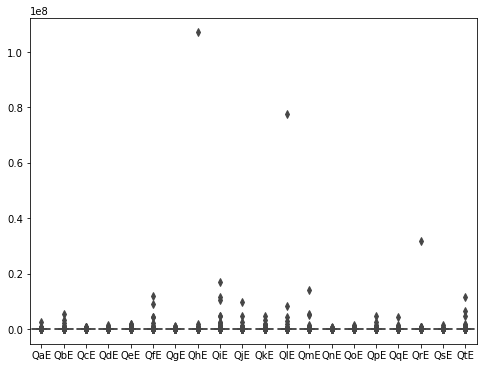

In [50]:
time_tr = data_tr[['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=time_tr)

test의 범위와 같게만 만들어주었다

In [51]:
familysize = data_tr['familysize']

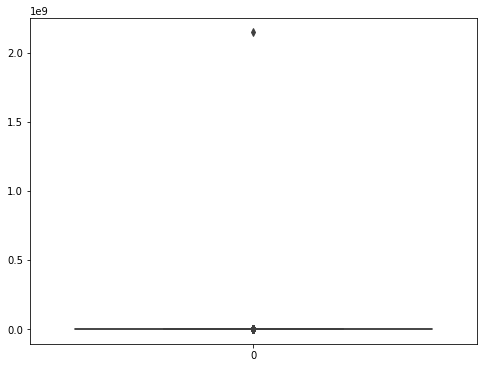

In [52]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=familysize)

이상치가 좀 심하게 있다 test의 범위과 맞춰주자

In [53]:
data_tr.sort_values(by = 'familysize', ascending = False)['familysize'][:10]

index
24598    2147483647
379             999
25661           100
12056            44
21567            44
34847            44
28111            34
41326            30
4515             21
34749            21
Name: familysize, dtype: int64

In [54]:
data_te.sort_values(by = 'familysize', ascending = False)['familysize'][:1]

index
3073    23
Name: familysize, dtype: int64

In [55]:
import statistics

statistics.median(train['familysize'])

2.0

In [56]:
data_tr = data_tr.replace({'familysize': 2147483647}, {'familysize': 2})
data_tr = data_tr.replace({'familysize': 999}, {'familysize': 2})
data_tr = data_tr.replace({'familysize': 100}, {'familysize': 2})
data_tr = data_tr.replace({'familysize': 44}, {'familysize': 2})
data_tr = data_tr.replace({'familysize': 34}, {'familysize': 2})
data_tr = data_tr.replace({'familysize': 30}, {'familysize': 2})

In [57]:
data_tr.sort_values(by = 'familysize', ascending = False)['familysize'][:10]

index
4515     21
34749    21
7512     20
14322    20
41413    18
24696    17
42486    17
35194    17
18123    16
31981    16
Name: familysize, dtype: int64

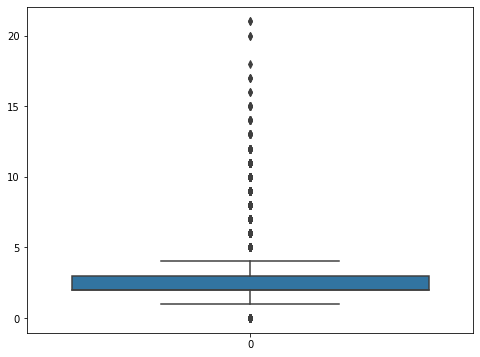

In [58]:
familysize = data_tr['familysize']
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=familysize)

종교와 인종은 other이 무응답으로 보기 어려우므로 결측치 처리를 하지 않는다.

무응답수가 적은 변수는 순서대로 engnat, married, hand, urban, education이다.

In [59]:
a=data_tr.loc[:,['age_group', 'education', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion','urban','Machiavelli Score', 'wf_sum', 'wr_sum', 'wfr_sum', 'wfr_minus',
       'tp_Sincerity', 'tp_Affinity', 'tp_Emotional Stability',
       'tp_Experience Openess', 'tp_Extrovertness']]

In [60]:
a[['education', 'engnat', 'hand', 'married','urban']]=a[['education', 'engnat', 'hand', 'married','urban']].replace(0, np.nan)

In [61]:
data_tr['age_group'].value_counts()

10s     14215
20s     14112
30s      7836
40s      5051
50s      2889
60s      1194
+70s      235
Name: age_group, dtype: int64

In [62]:
a['age_group'].replace(['10s','20s','30s','40s','50s','60s','+70s'],[1,2,3,4,5,6,7],inplace=True)
a['gender'].replace(['Male','Female'],[1,2],inplace=True)

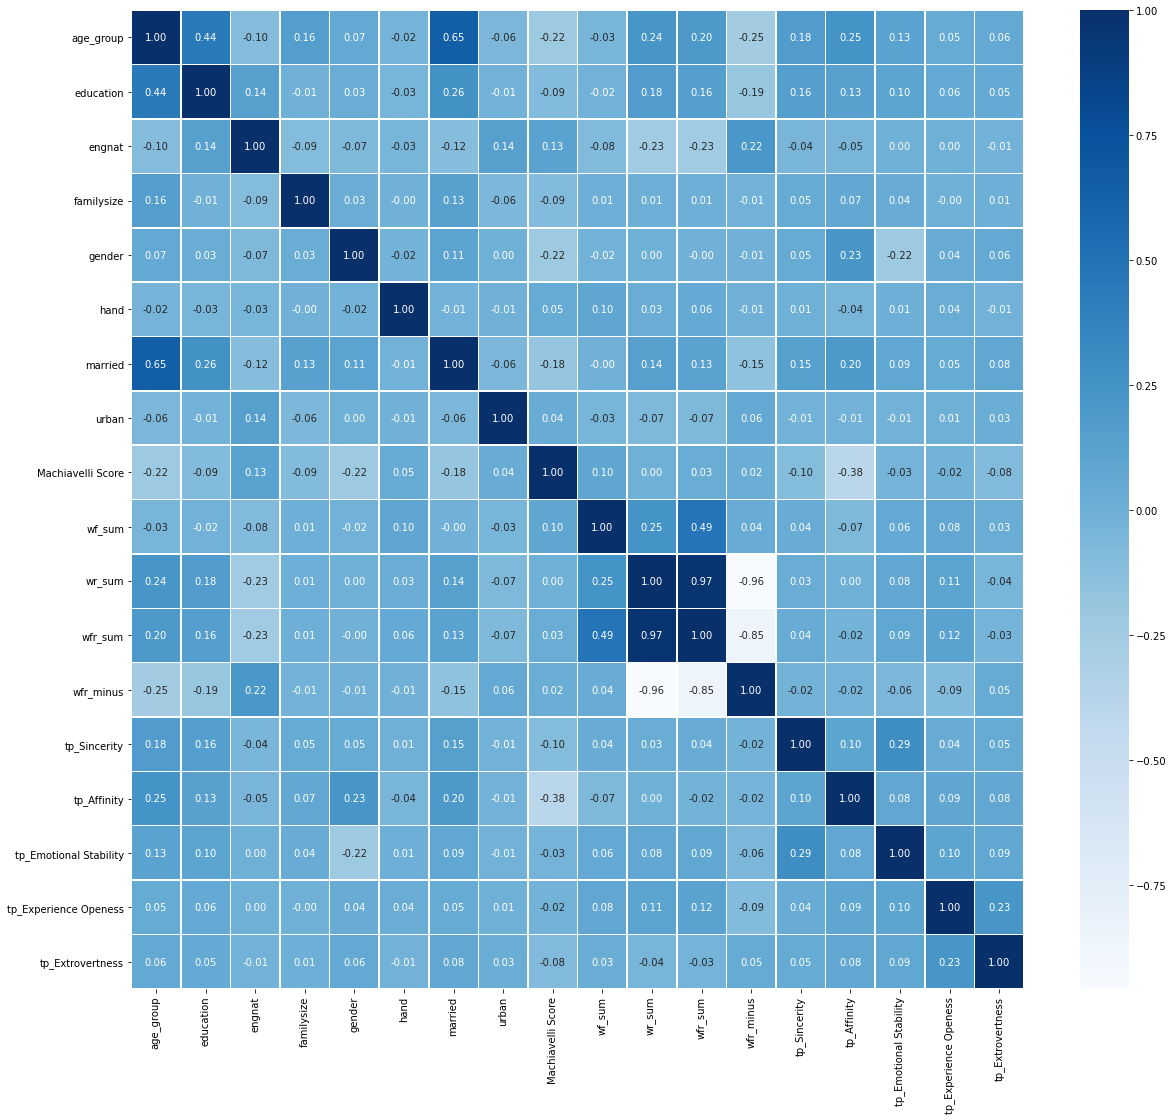

In [63]:
sns.heatmap(data=a.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

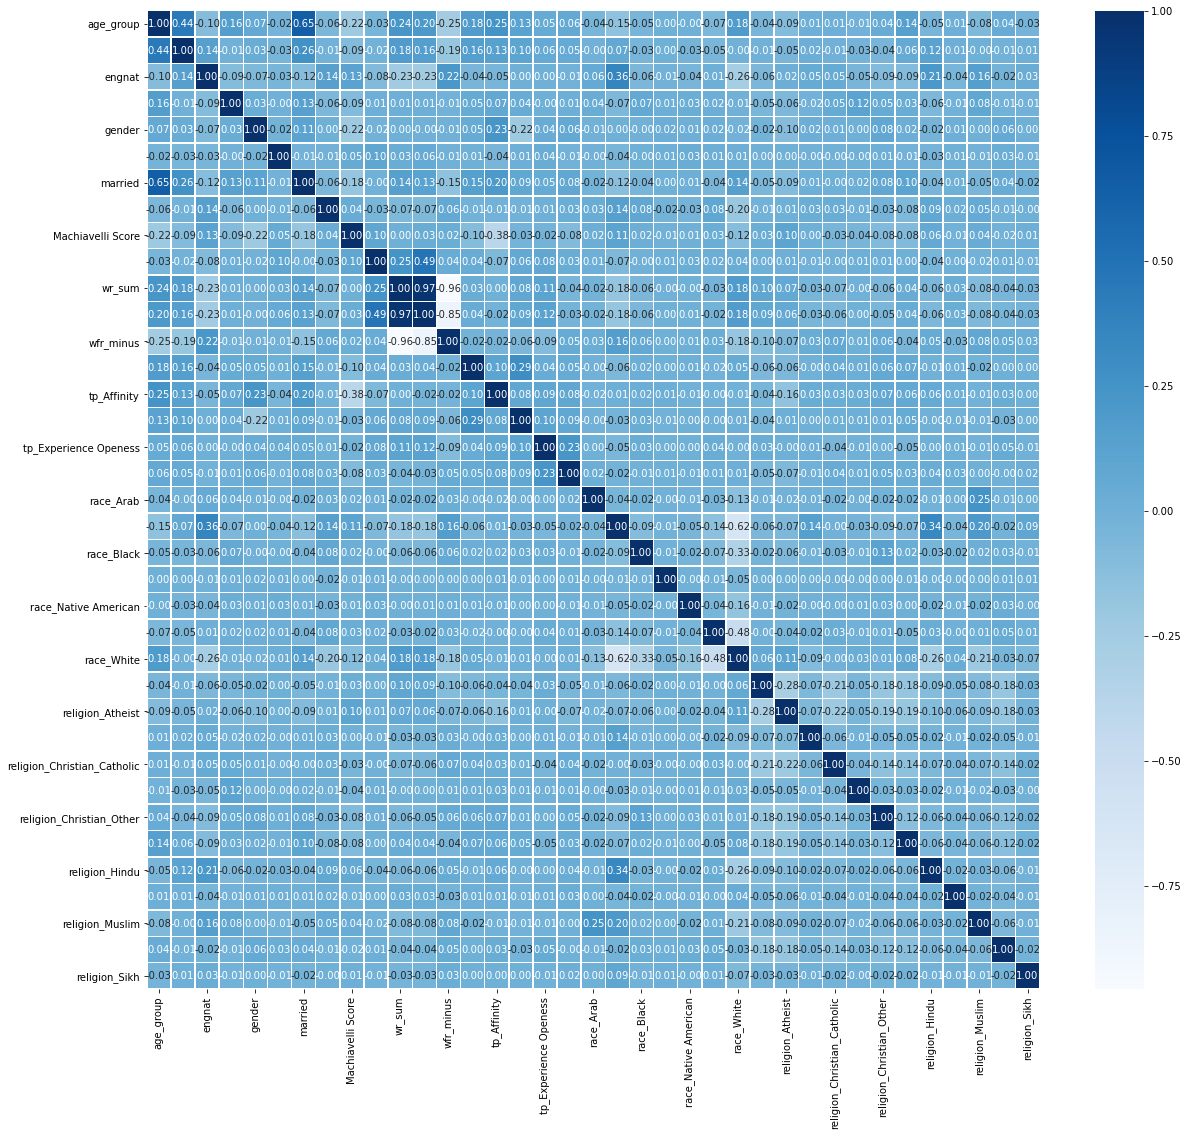

In [64]:
b=pd.get_dummies(a)
sns.heatmap(data=b.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

In [65]:
data=data_tr.copy()
test=data_te.copy()

In [66]:
data.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
       'Machiavelli Score', 'wf_sum', 'wr_sum', 'wfr_sum', 'wfr_minus',
       'tp_Sincerity', 'tp_Affinity', 'tp_Emotional Stability',
       'tp_Experience Openess', 'tp_Extrovertness'],
      dtype='object')

결혼 여부와 교육수준이 연령과 어느정도 연관성을 보인다

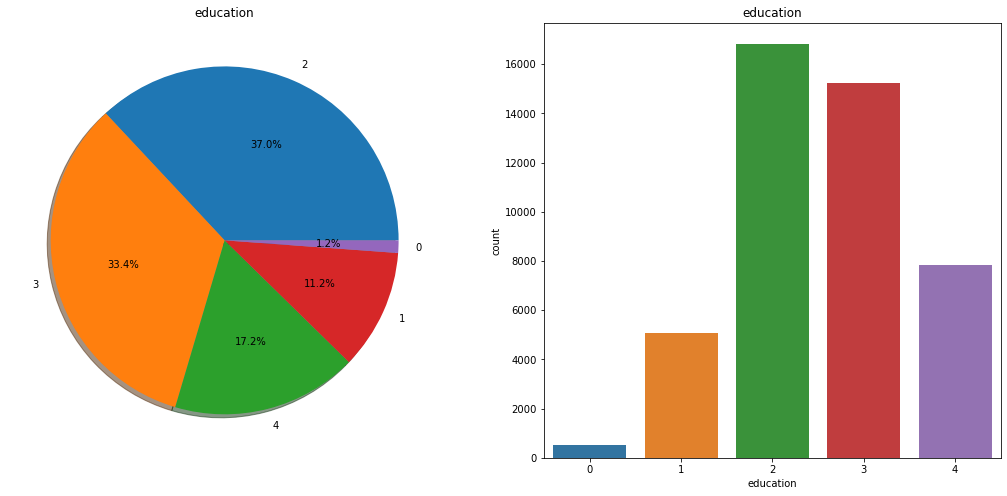

In [67]:
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
data['education'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('education') # 첫 번째 그래프 제목
ax[0].set_ylabel('') # ylable은 공백
sns.countplot('education',data=data,ax=ax[1])
# 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

ax[1].set_title('education') # 두 번째 그래프 제목
plt.show()

education : 교육 수준
- 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답

High school의 학력이 가장 많았다. 대학 학부 졸업생도 많았다.

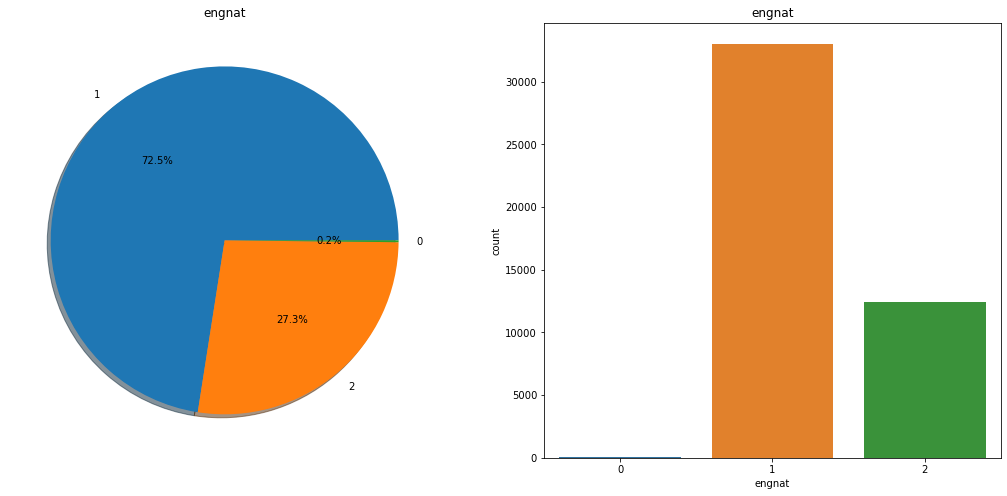

In [68]:
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
data['engnat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('engnat') # 첫 번째 그래프 제목
ax[0].set_ylabel('') # ylable은 공백
sns.countplot('engnat',data=data,ax=ax[1])
# 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

ax[1].set_title('engnat') # 두 번째 그래프 제목
plt.show()

engnat : 모국어가 영어
- 1=Yes, 2=No, 0=무응답

역시 모국어가 영어인 사람이 많았다

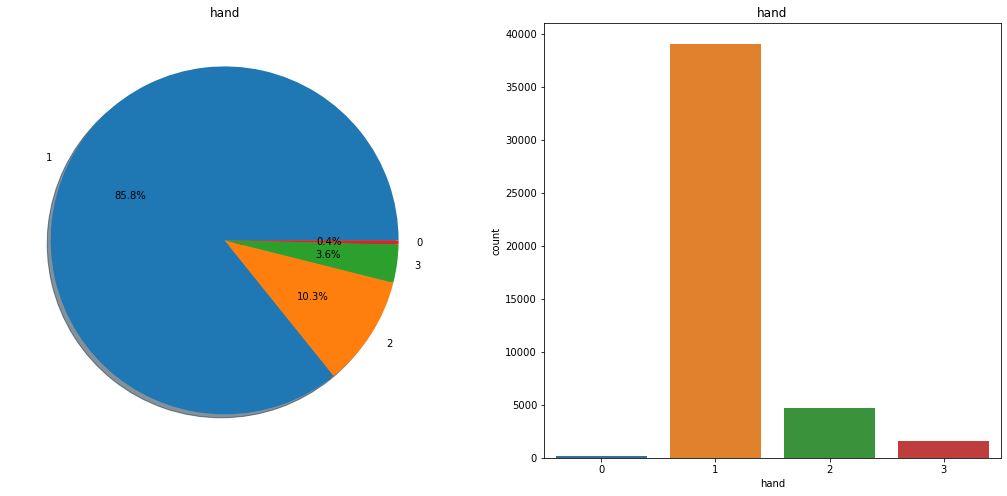

In [69]:
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
data['hand'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('hand') # 첫 번째 그래프 제목
ax[0].set_ylabel('') # ylable은 공백
sns.countplot('hand',data=data,ax=ax[1])
# 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

ax[1].set_title('hand') # 두 번째 그래프 제목
plt.show()

hand : 필기하는 손
- 1=Right, 2=Left, 3=Both, 0=무응답

생각했던 것 보다는 오른손잡이가 큰 비율을 차지한다

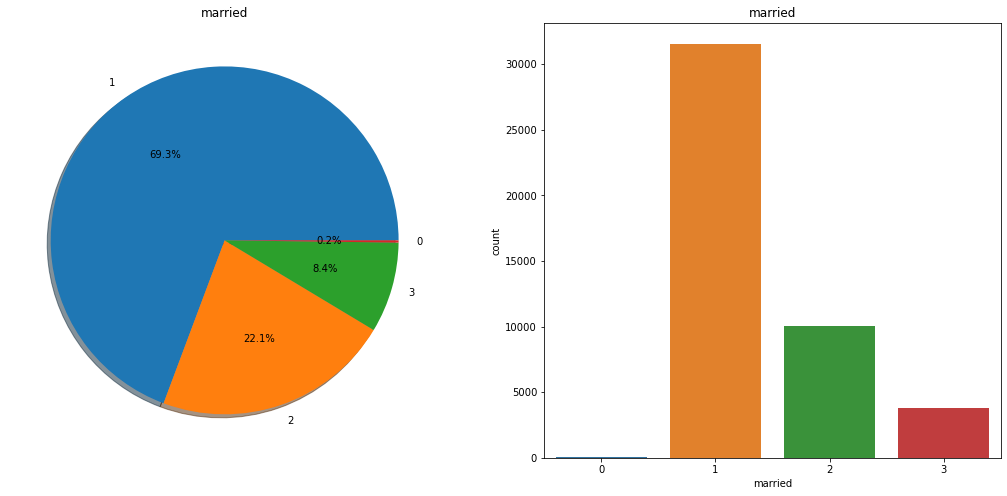

In [70]:
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
data['married'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('married') # 첫 번째 그래프 제목
ax[0].set_ylabel('') # ylable은 공백
sns.countplot('married',data=data,ax=ax[1])
# 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

ax[1].set_title('married') # 두 번째 그래프 제목
plt.show()

married : 혼인 상태
- 1=Never married, 2=Currently married, 3=Previously married, 0=Other

미혼률이 생각보다 높았다.

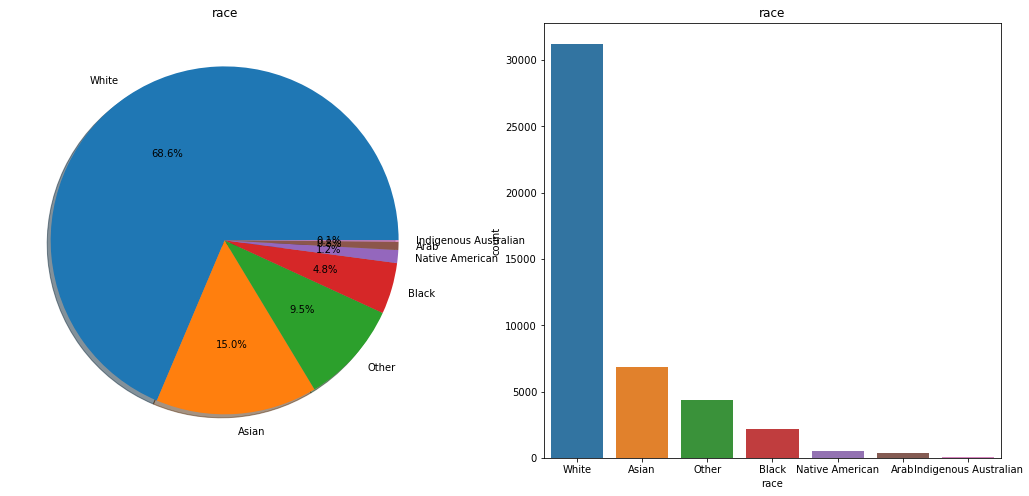

In [71]:
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
data['race'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('race') # 첫 번째 그래프 제목
ax[0].set_ylabel('') # ylable은 공백
sns.countplot('race',data=data,ax=ax[1])
# 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

ax[1].set_title('race') # 두 번째 그래프 제목
plt.show()

백인, 아시아인, 기타인종, 흑인 순으로 인종비율이 높았다.

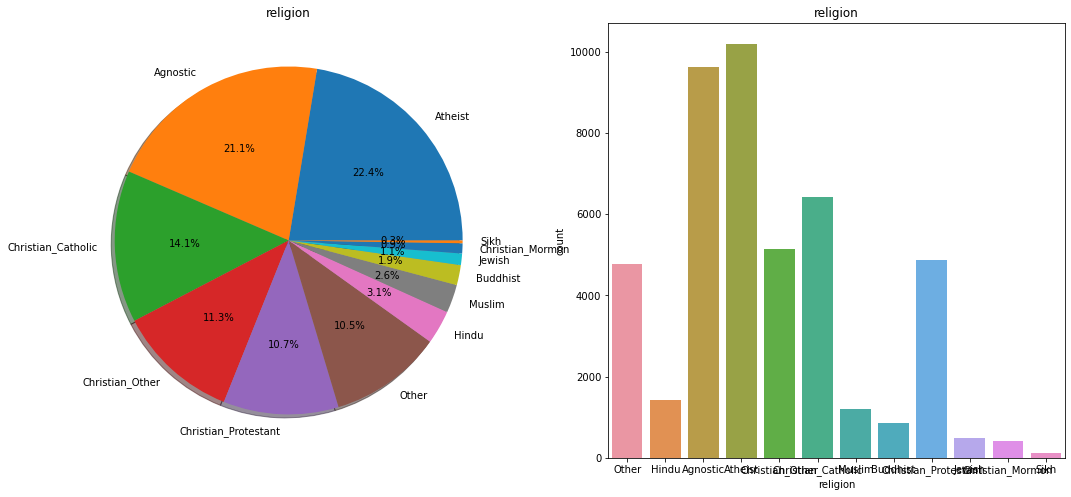

In [72]:
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
data['religion'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('religion') # 첫 번째 그래프 제목
ax[0].set_ylabel('') # ylable은 공백
sns.countplot('religion',data=data,ax=ax[1])
# 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

ax[1].set_title('religion') # 두 번째 그래프 제목
plt.show()

religion : 종교
- Agnostic-불가지론:신의 존재유무는 알수없다.
- Buddhist-무신론자:신은 존재하지 않는다.
- Christian_Catholic:가톨릭교
- Christian_Mormon:몰몬교
- Christian_Protestant:개신교
- Christian_Other:크리스찬_기타
- Hindu:힌두교
- Jewish:유대인
- Muslim:이슬람교
- Sikh:시크교

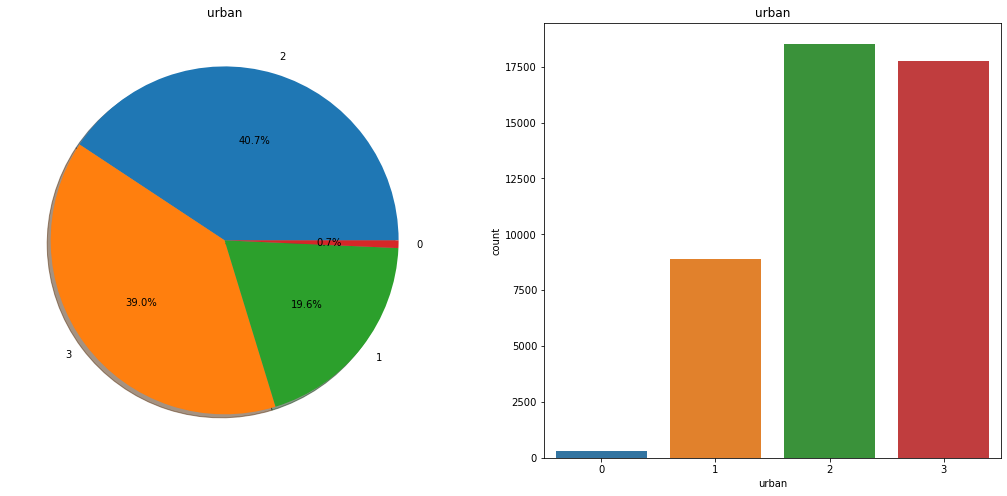

In [73]:
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
data['urban'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('urban') # 첫 번째 그래프 제목
ax[0].set_ylabel('') # ylable은 공백
sns.countplot('urban',data=data,ax=ax[1])
# 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

ax[1].set_title('urban') # 두 번째 그래프 제목
plt.show()

urban : 유년기의 거주 구역
- 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

중소도시와 대도시의 비율이 비슷하게 높았다.

In [74]:
pd.crosstab(data.race,data.engnat,margins=True).style.background_gradient(cmap='summer_r')

engnat,0,1,2,All
race,,,,
Arab,1,154,196,351
Asian,13,2334,4487,6834
Black,4,1814,350,2168
Indigenous Australian,0,47,6,53
Native American,0,488,60,548
Other,8,3058,1264,4330
White,51,25129,6068,31248
All,77,33024,12431,45532


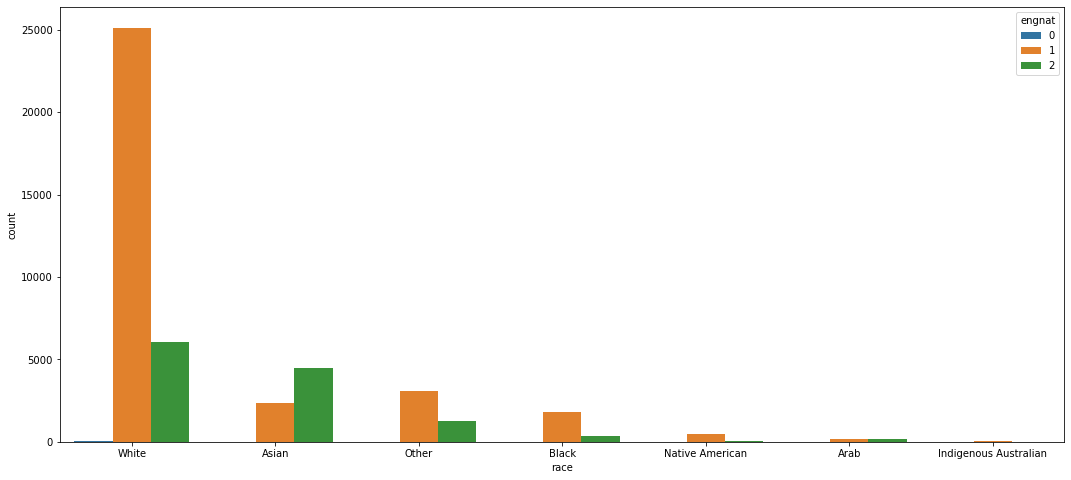

In [75]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='engnat',data=data)
plt.show()

In [76]:
pd.crosstab(data.religion,data.engnat,margins=True).style.background_gradient(cmap='summer_r')

engnat,0,1,2,All
religion,,,,
Agnostic,17,7489,2118,9624
Atheist,13,7219,2960,10192
Buddhist,1,482,367,850
Christian_Catholic,15,4340,2076,6431
Christian_Mormon,0,402,26,428
Christian_Other,11,4292,834,5137
Christian_Protestant,8,4103,764,4875
Hindu,3,290,1136,1429
Jewish,2,428,57,487


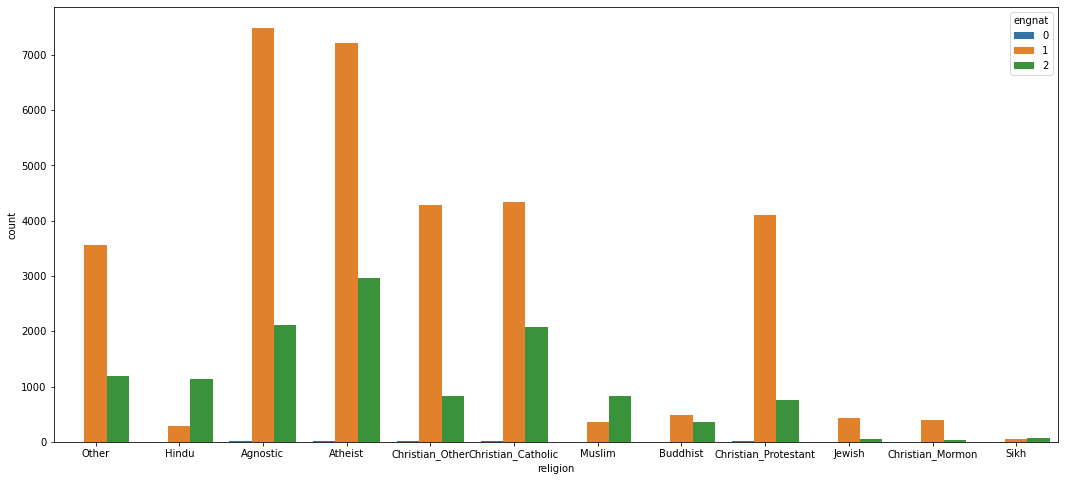

In [77]:
plt.subplots(figsize=(18,8))
sns.countplot('religion',hue='engnat',data=data)
plt.show()

In [78]:
pd.crosstab(data.urban,data.engnat,margins=True).style.background_gradient(cmap='summer_r')

engnat,0,1,2,All
urban,,,,
0,3,230,89,322
1,11,6681,2217,8909
2,34,15161,3339,18534
3,29,10952,6786,17767
All,77,33024,12431,45532


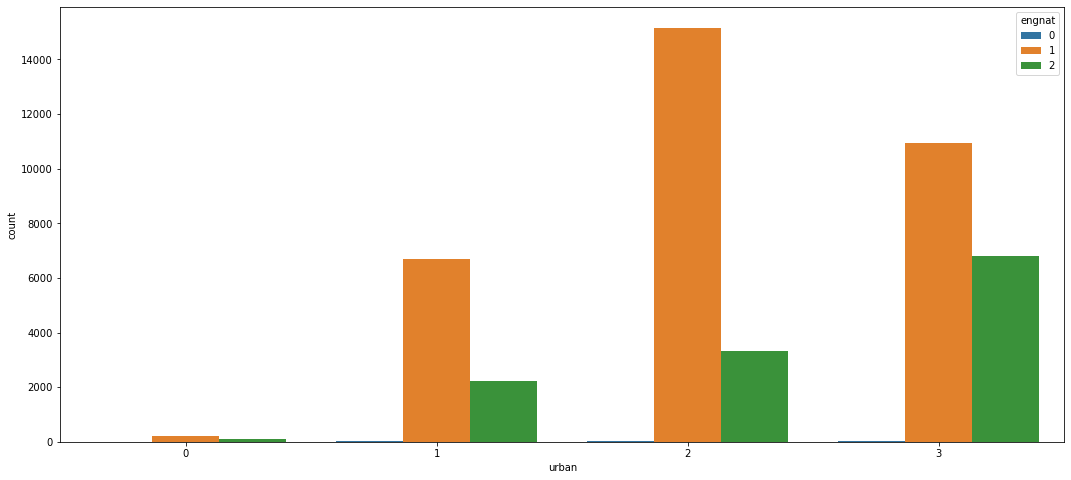

In [79]:
plt.subplots(figsize=(18,8))
sns.countplot('urban',hue='engnat',data=data)
plt.show()

언어는 문화권으로부터 구별되는 특징이 있다. 세계를 보면 문화는 인종 및 지역, 종교에 따라 다르므로 각 수준에 따라 비교를 해보았다. 

비교를 해보니 인종 및 종교와 모국어가 영어인지는 차이를 보였다. 특히 인종에 따라 큰 차이를 보였다. 위의 자료를 바탕으로 언어에 대한 무응답 결측치를 처리한다

In [80]:
data[(data['engnat'] == 0) & (data['race'] == 'White')] = data[(data['engnat'] == 0) & (data['race'] == 'White')].replace({'engnat': 0}, {'engnat': 1})
data[(data['engnat'] == 0) & (data['race'] == 'Black')] = data[(data['engnat'] == 0) & (data['race'] == 'Black')].replace({'engnat': 0}, {'engnat': 1})
data[(data['engnat'] == 0) & (data['race'] == 'Other')] = data[(data['engnat'] == 0) & (data['race'] == 'Other')].replace({'engnat': 0}, {'engnat': 1})

In [81]:
data[(data['engnat'] == 0) & (data['race'] == 'Asian')] = data[(data['engnat'] == 0) & (data['race'] == 'Asian')].replace({'engnat': 0}, {'engnat': 2})
data[(data['engnat'] == 0) & (data['race'] == 'Arab')] = data[(data['engnat'] == 0) & (data['race'] == 'Arab')].replace({'engnat': 0}, {'engnat': 2})

In [82]:
pd.crosstab(test.race,test.engnat,margins=True).style.background_gradient(cmap='summer_r')

engnat,0,1,2,All
race,,,,
Arab,0,32,51,83
Asian,5,578,1081,1664
Black,2,461,74,537
Indigenous Australian,0,8,3,11
Native American,0,110,7,117
Other,1,727,325,1053
White,9,6358,1551,7918
All,17,8274,3092,11383


In [83]:
test[(test['engnat'] == 0) & (test['race'] == 'White')] = test[(test['engnat'] == 0) & (test['race'] == 'White')].replace({'engnat': 0}, {'engnat': 1})
test[(test['engnat'] == 0) & (test['race'] == 'Black')] = test[(test['engnat'] == 0) & (test['race'] == 'Black')].replace({'engnat': 0}, {'engnat': 1})
test[(test['engnat'] == 0) & (test['race'] == 'Other')] = test[(test['engnat'] == 0) & (test['race'] == 'Other')].replace({'engnat': 0}, {'engnat': 1})

test[(test['engnat'] == 0) & (test['race'] == 'Asian')] = test[(test['engnat'] == 0) & (test['race'] == 'Asian')].replace({'engnat': 0}, {'engnat': 2})
test[(test['engnat'] == 0) & (test['race'] == 'Arab')] = test[(test['engnat'] == 0) & (test['race'] == 'Arab')].replace({'engnat': 0}, {'engnat': 2})

In [84]:
data['engnat'].value_counts()

1    33087
2    12445
Name: engnat, dtype: int64

In [85]:
test['engnat'].value_counts()

1    8286
2    3097
Name: engnat, dtype: int64

engnat의 무응답은 모두 처리해주었다.

그 다음 무응답 수가 적은 married의 변수를 다루자

married 변수는 연령대와 연관을 보였다.

In [86]:
pd.crosstab(a.age_group,data.married,margins=True).style.background_gradient(cmap='summer_r')

married,0,1,2,3,All
age_group,,,,,
1,40,14075,73,27,14215
2,19,12317,1495,281,14112
3,10,3539,3296,991,7836
4,16,1086,2762,1187,5051
5,4,407,1575,903,2889
6,4,112,722,356,1194
7,0,14,136,85,235
All,93,31550,10059,3830,45532


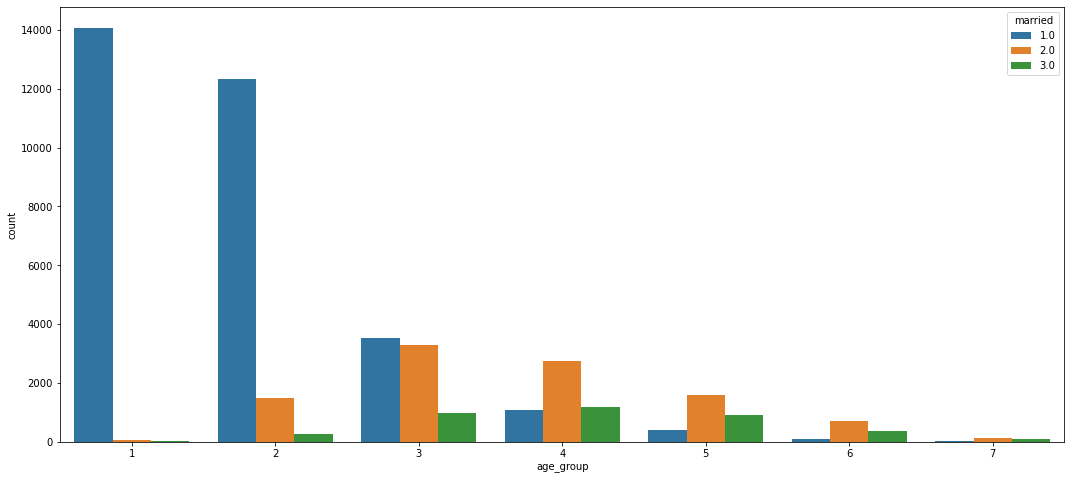

In [87]:
plt.subplots(figsize=(18,8))
sns.countplot('age_group',hue='married',data=a)
plt.show()

10-20대는 미혼의 비율이 매우 높았다. married 변수는 또한 age_group과 관계가 있는 교육수준과도 일정한 연관을 보이므로 crosstab으로 비교해보았다. 이때 education 변수는 무응답 비율이 어느정도 있으므로 참고만 하도록하였다

In [88]:
pd.crosstab([data.age_group,data.education],data.married,margins=True).style.background_gradient(cmap='summer_r')

In [89]:
data[(data['married'] == 0) & (data['age_group'] == '10s')] = data[(data['married'] == 0) & (data['age_group'] == '10s')].replace({'married': 0}, {'married': 1})
data[(data['married'] == 0) & (data['age_group'] == '20s')] = data[(data['married'] == 0) & (data['age_group'] == '20s')].replace({'married': 0}, {'married': 1})

In [90]:
data[(data['married'] == 0) & (data['age_group'] == '30s') & (data['education'] == 2)] = data[(data['married'] == 0) & (data['age_group'] == '30s') & (data['education'] == 2)].replace({'married': 0}, {'married': 1})
data[(data['married'] == 0) & (data['age_group'] == '30s') & (data['education'] == 3)] = data[(data['married'] == 0) & (data['age_group'] == '30s') & (data['education'] == 3)].replace({'married': 0}, {'married': 1})
data[(data['married'] == 0) & (data['age_group'] == '30s') & (data['education'] == 4)] = data[(data['married'] == 0) & (data['age_group'] == '30s') & (data['education'] == 4)].replace({'married': 0}, {'married': 2})

In [91]:
data[(data['married'] == 0) & (data['age_group'] == '40s')] = data[(data['married'] == 0) & (data['age_group'] == '40s')].replace({'married': 0}, {'married': 2})
data[(data['married'] == 0) & (data['age_group'] == '50s')] = data[(data['married'] == 0) & (data['age_group'] == '50s')].replace({'married': 0}, {'married': 2})
data[(data['married'] == 0) & (data['age_group'] == '60s')] = data[(data['married'] == 0) & (data['age_group'] == '60s')].replace({'married': 0}, {'married': 2})
data[(data['married'] == 0) & (data['age_group'] == '+70s')] = data[(data['married'] == 0) & (data['age_group'] == '70s')].replace({'married': 0}, {'married': 2})

In [92]:
pd.crosstab(test.age_group,test.married,margins=True).style.background_gradient(cmap='summer_r')

married,0,1,2,3,All
age_group,,,,,
+70s,1,4,46,21,72
10s,13,3566,20,4,3603
20s,3,3069,400,77,3549
30s,6,881,803,234,1924
40s,3,280,658,316,1257
50s,1,99,377,215,692
60s,1,29,165,91,286
All,28,7928,2469,958,11383


In [93]:
test[(test['married'] == 0) & (test['age_group'] == '10s')] = test[(test['married'] == 0) & (test['age_group'] == '10s')].replace({'married': 0}, {'married': 1})
test[(test['married'] == 0) & (test['age_group'] == '20s')] = test[(test['married'] == 0) & (test['age_group'] == '20s')].replace({'married': 0}, {'married': 1})

test[(test['married'] == 0) & (test['age_group'] == '30s') & (test['education'] == 2)] = test[(test['married'] == 0) & (test['age_group'] == '30s') & (test['education'] == 2)].replace({'married': 0}, {'married': 1})
test[(test['married'] == 0) & (test['age_group'] == '30s') & (test['education'] == 3)] = test[(test['married'] == 0) & (test['age_group'] == '30s') & (test['education'] == 2)].replace({'married': 0}, {'married': 1})
test[(test['married'] == 0) & (test['age_group'] == '30s') & (test['education'] == 4)] = test[(test['married'] == 0) & (test['age_group'] == '30s') & (test['education'] == 2)].replace({'married': 0}, {'married': 2})

test[(test['married'] == 0) & (test['age_group'] == '40s')] = test[(test['married'] == 0) & (test['age_group'] == '40s')].replace({'married': 0}, {'married': 2})
test[(test['married'] == 0) & (test['age_group'] == '50s')] = test[(test['married'] == 0) & (test['age_group'] == '50s')].replace({'married': 0}, {'married': 2})
test[(test['married'] == 0) & (test['age_group'] == '60s')] = test[(test['married'] == 0) & (test['age_group'] == '60s')].replace({'married': 0}, {'married': 2})
test[(test['married'] == 0) & (test['age_group'] == '+70s')] = test[(test['married'] == 0) & (test['age_group'] == '70s')].replace({'married': 0}, {'married': 2})

In [94]:
data['married'].value_counts()

1    31616
2    10086
3     3830
Name: married, dtype: int64

In [95]:
test['married'].value_counts()

1.0    7946
2.0    2474
3.0     958
Name: married, dtype: int64

In [96]:
pd.crosstab(data.education,data.hand,margins=True).style.background_gradient(cmap='summer_r')

hand,0,1,2,3,All
education,,,,,
0,10,438,58,22,528
1,21,4282,548,237,5088
2,50,14338,1786,661,16835
3,49,13127,1579,472,15227
4,31,6873,721,229,7854
All,161,39058,4692,1621,45532


In [97]:
data.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
       'Machiavelli Score', 'wf_sum', 'wr_sum', 'wfr_sum', 'wfr_minus',
       'tp_Sincerity', 'tp_Affinity', 'tp_Emotional Stability',
       'tp_Experience Openess', 'tp_Extrovertness'],
      dtype='object')

In [98]:
hand=data[['hand','tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 'tp08', 'tp09', 'tp10']]

In [99]:
hand

,hand,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
index,,,,,,,,,,,
0,1,5,5,5,6,5,6,5,3,3,4
1,1,6,6,7,7,6,5,4,3,7,3
2,1,5,4,6,2,4,3,5,1,6,4
3,1,5,3,6,6,6,4,6,4,6,4
4,1,6,6,6,1,7,5,7,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
45527,3,6,5,1,6,5,1,4,7,1,3
45528,1,5,5,5,4,6,4,4,3,6,2
45529,1,3,3,5,3,7,6,7,5,6,1


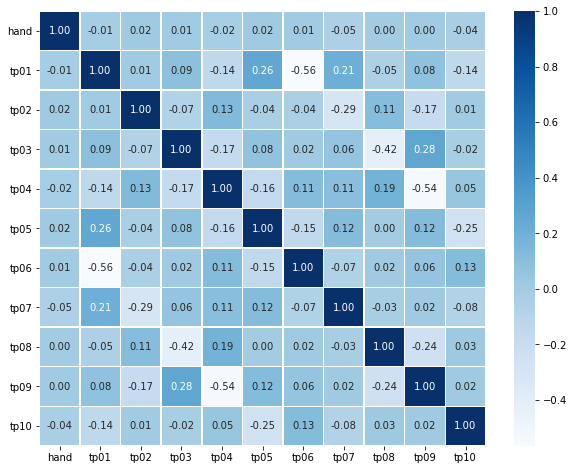

In [100]:
sns.heatmap(data=hand.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

In [101]:
hand=data[['hand','QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE']]

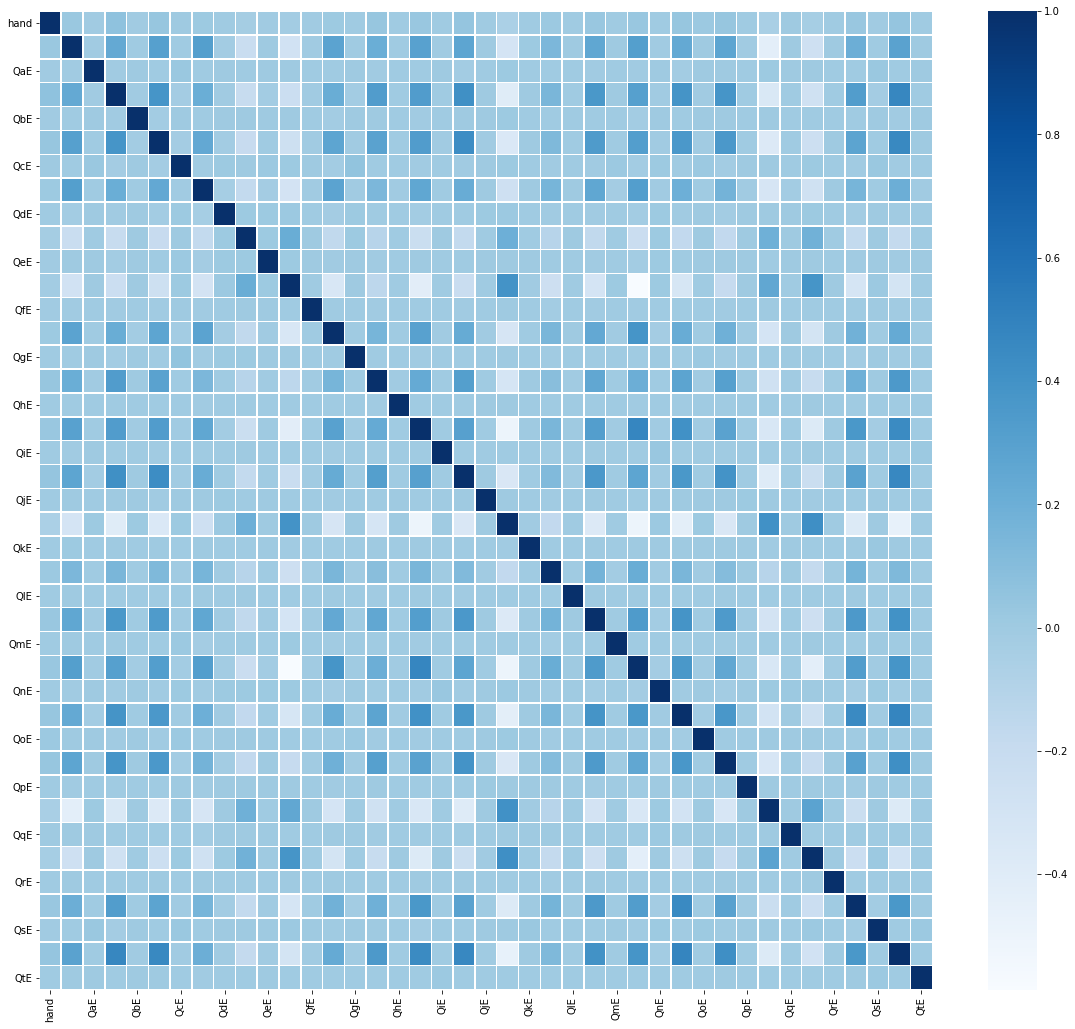

In [102]:
sns.heatmap(data=hand.corr(),annot=False,fmt='.2f', linewidths=.5,cmap='Blues')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

In [103]:
hand=data[['hand','wf_01','wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']]

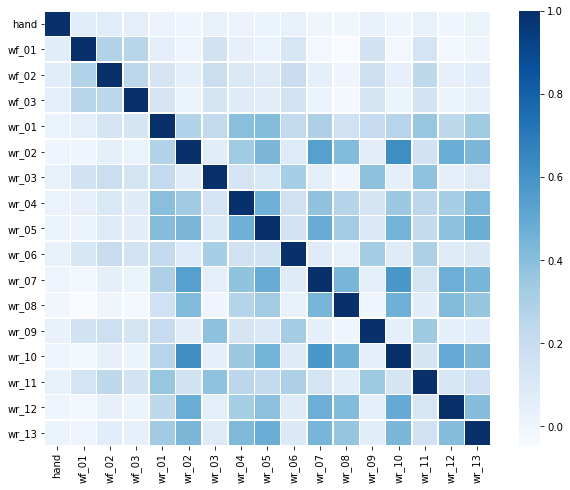

In [104]:
sns.heatmap(data=hand.corr(),annot=False,fmt='.2f', linewidths=.5,cmap='Blues')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

사용하는 손으로 인하여 좌뇌 우뇌가 발달한다라는 말이 많고 왼손잡이는 고집이 쎄다 뭐 이런 말들이 많다. 하지만 위의 설문지의 변수들을 바탕으로 성향을 봤을때 큰 경향을 보이지 않았다. 심지어 종교나 인종에 따라도 큰 경향이 없었다. 왜지?? 음 결국 최빈값으로 대체한다.

In [105]:
pd.crosstab(data.religion,train.hand,margins=True).style.background_gradient(cmap='summer_r')

hand,0,1,2,3,All
religion,,,,,
Agnostic,28,8234,1024,338,9624
Atheist,36,8706,1123,327,10192
Buddhist,2,743,69,36,850
Christian_Catholic,21,5513,699,198,6431
Christian_Mormon,0,369,44,15,428
Christian_Other,24,4377,520,216,5137
Christian_Protestant,14,4210,531,120,4875
Hindu,7,1313,74,35,1429
Jewish,2,411,51,23,487


In [106]:
pd.crosstab(data.race,train.hand,margins=True).style.background_gradient(cmap='summer_r')

hand,0,1,2,3,All
race,,,,,
Arab,0,308,31,12,351
Asian,34,6093,521,186,6834
Black,10,1867,205,86,2168
Indigenous Australian,0,43,6,4,53
Native American,3,434,59,52,548
Other,14,3693,400,223,4330
White,100,26620,3470,1058,31248
All,161,39058,4692,1621,45532


In [107]:
data[(data['hand'] == 0)] = data[(data['hand'] == 0)].replace({'hand': 0}, {'hand': 1})

In [108]:
test[(test['hand'] == 0)] = test[(test['hand'] == 0)].replace({'hand': 0}, {'hand': 1})

In [109]:
data['hand'].value_counts()

1    39219
2     4692
3     1621
Name: hand, dtype: int64

In [110]:
test['hand'].value_counts()

1.0    9854
2.0    1154
3.0     370
Name: hand, dtype: int64

In [111]:
pd.crosstab(data.religion,train.urban,margins=True).style.background_gradient(cmap='summer_r')

urban,0,1,2,3,All
religion,,,,,
Agnostic,64,1808,4271,3481,9624
Atheist,65,1881,4293,3953,10192
Buddhist,5,152,252,441,850
Christian_Catholic,45,1055,2625,2706,6431
Christian_Mormon,4,73,215,136,428
Christian_Other,46,1241,1933,1917,5137
Christian_Protestant,31,1267,2164,1413,4875
Hindu,18,123,377,911,1429
Jewish,2,36,265,184,487


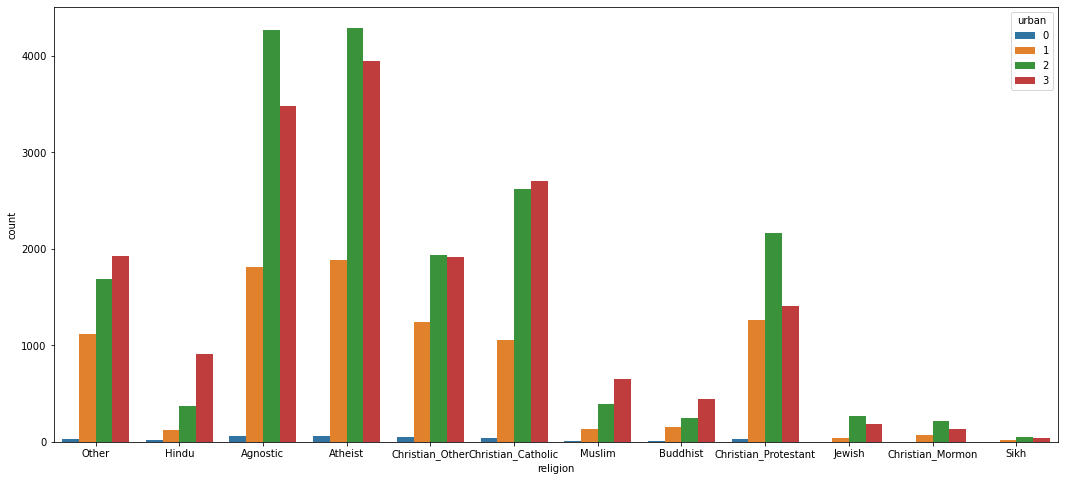

In [112]:
plt.subplots(figsize=(18,8))
sns.countplot('religion',hue='urban',data=data)
plt.show()

In [113]:
pd.crosstab(data.race,train.urban,margins=True).style.background_gradient(cmap='summer_r')

urban,0,1,2,3,All
race,,,,,
Arab,0,31,119,201,351
Asian,48,803,2145,3838,6834
Black,21,205,765,1177,2168
Indigenous Australian,0,19,24,10,53
Native American,3,183,167,195,548
Other,31,513,1610,2176,4330
White,219,7155,13704,10170,31248
All,322,8909,18534,17767,45532


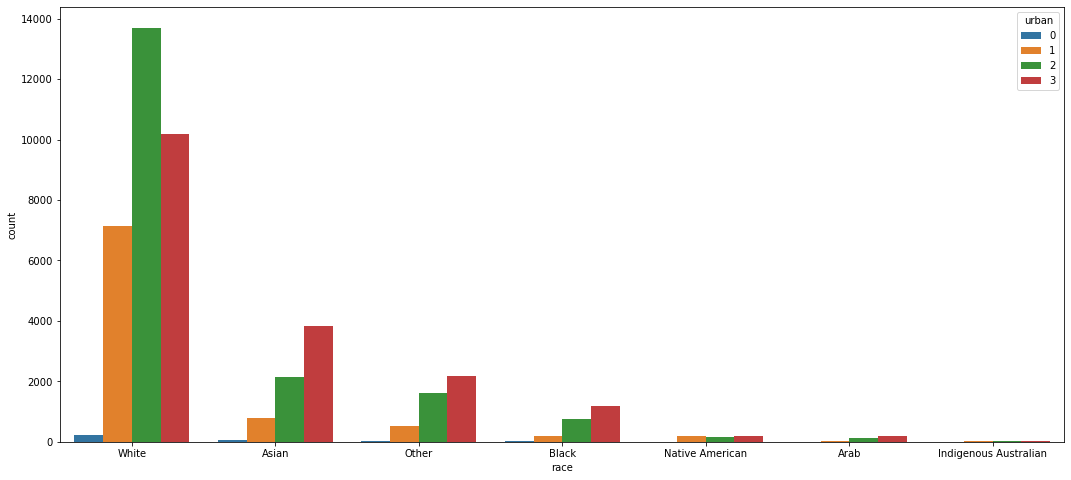

In [114]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='urban',data=data)
plt.show()

In [115]:
pd.crosstab([data.race,data.religion],train.urban,margins=True).style.background_gradient(cmap='summer_r')

In [116]:
dummies=pd.get_dummies(data)

In [117]:
list(dummies.columns)

['QaA',
 'QaE',
 'QbA',
 'QbE',
 'QcA',
 'QcE',
 'QdA',
 'QdE',
 'QeA',
 'QeE',
 'QfA',
 'QfE',
 'QgA',
 'QgE',
 'QhA',
 'QhE',
 'QiA',
 'QiE',
 'QjA',
 'QjE',
 'QkA',
 'QkE',
 'QlA',
 'QlE',
 'QmA',
 'QmE',
 'QnA',
 'QnE',
 'QoA',
 'QoE',
 'QpA',
 'QpE',
 'QqA',
 'QqE',
 'QrA',
 'QrE',
 'QsA',
 'QsE',
 'QtA',
 'QtE',
 'education',
 'engnat',
 'familysize',
 'hand',
 'married',
 'tp01',
 'tp02',
 'tp03',
 'tp04',
 'tp05',
 'tp06',
 'tp07',
 'tp08',
 'tp09',
 'tp10',
 'urban',
 'voted',
 'wf_01',
 'wf_02',
 'wf_03',
 'wr_01',
 'wr_02',
 'wr_03',
 'wr_04',
 'wr_05',
 'wr_06',
 'wr_07',
 'wr_08',
 'wr_09',
 'wr_10',
 'wr_11',
 'wr_12',
 'wr_13',
 'Machiavelli Score',
 'wf_sum',
 'wr_sum',
 'wfr_sum',
 'wfr_minus',
 'tp_Sincerity',
 'tp_Affinity',
 'tp_Emotional Stability',
 'tp_Experience Openess',
 'tp_Extrovertness',
 'age_group_+70s',
 'age_group_10s',
 'age_group_20s',
 'age_group_30s',
 'age_group_40s',
 'age_group_50s',
 'age_group_60s',
 'gender_Female',
 'gender_Male',
 'race_Arab

In [118]:
urban=dummies[['urban','race_Arab',
 'race_Asian',
 'race_Black',
 'race_Indigenous Australian',
 'race_Native American',
 'race_Other',
 'race_White',
 'religion_Agnostic',
 'religion_Atheist',
 'religion_Buddhist',
 'religion_Christian_Catholic',
 'religion_Christian_Mormon',
 'religion_Christian_Other',
 'religion_Christian_Protestant',
 'religion_Hindu',
 'religion_Jewish',
 'religion_Muslim',
 'religion_Other',
 'religion_Sikh']]

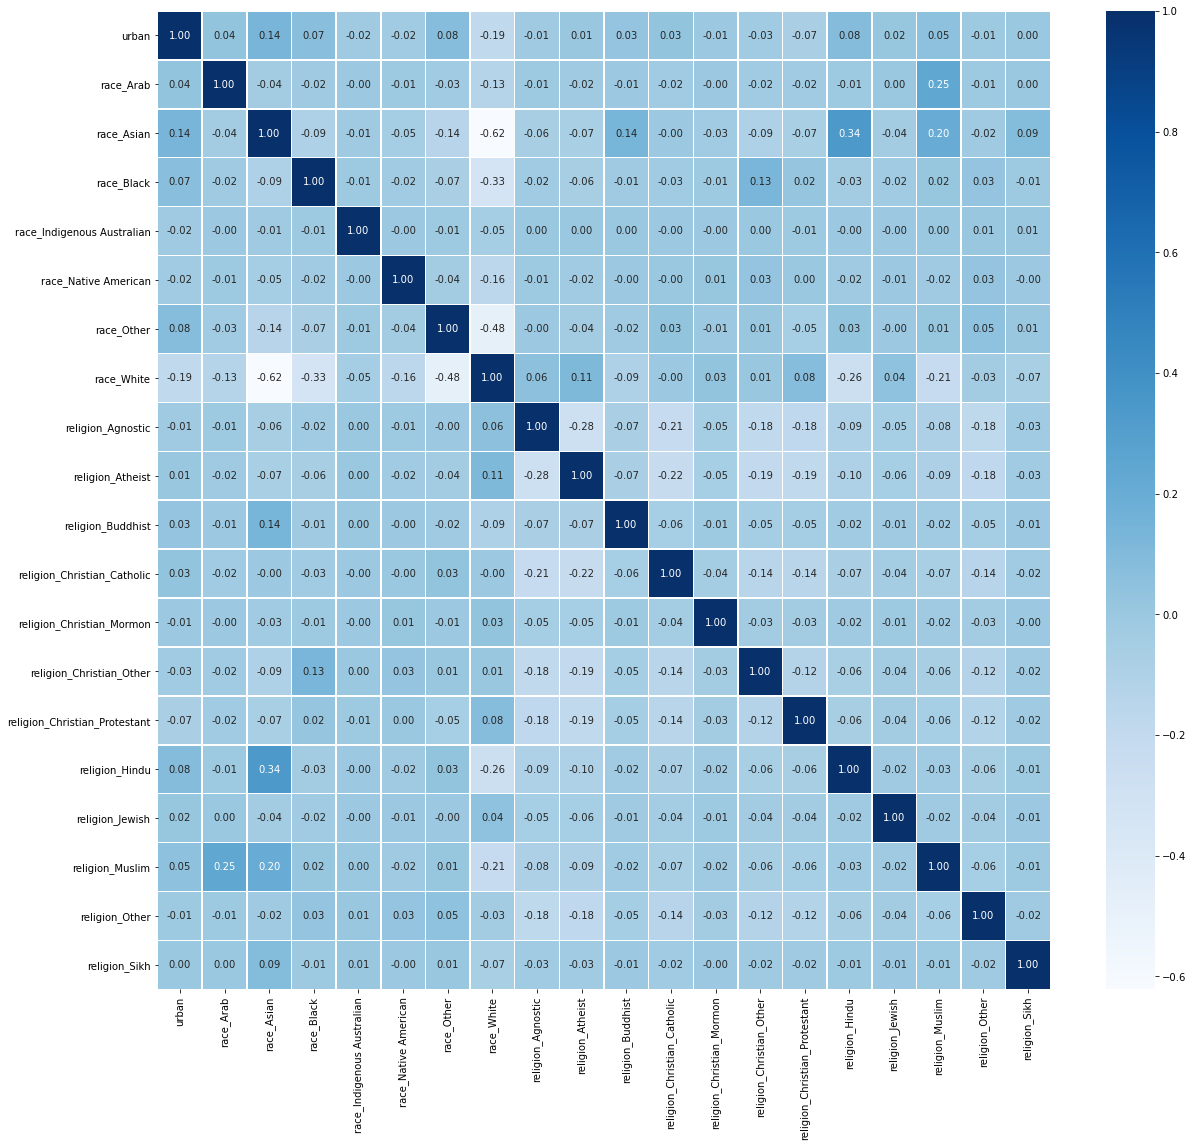

In [119]:
sns.heatmap(data=urban.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

확실히 앞에서 확인했던 다른 변수들보다는 상관관계가 높아졌다. 특히 종교보다는 인종에 따른 거주지역이 연관이 높았다. 이는 같은 인종끼리 비슷한 동네에 살기 때문임을 추측할수있다. (ex 차이나타운, 할렘, 텍사스의 히스패닉 등등) 따라서 인종에 따른 최빈값으로 urban의 무응답을 대체한다

In [120]:
pd.crosstab(data.race,train.urban,margins=True).style.background_gradient(cmap='summer_r')

urban,0,1,2,3,All
race,,,,,
Arab,0,31,119,201,351
Asian,48,803,2145,3838,6834
Black,21,205,765,1177,2168
Indigenous Australian,0,19,24,10,53
Native American,3,183,167,195,548
Other,31,513,1610,2176,4330
White,219,7155,13704,10170,31248
All,322,8909,18534,17767,45532


In [121]:
data[(data['urban'] == 0) & (data['race'] == 'Arab')] = data[(data['urban'] == 0) & (data['race'] == 'Arab')].replace({'urban': 0}, {'urban': 3})
data[(data['urban'] == 0) & (data['race'] == 'Asian')] = data[(data['urban'] == 0) & (data['race'] == 'Asian')].replace({'urban': 0}, {'urban': 3})
data[(data['urban'] == 0) & (data['race'] == 'Black')] = data[(data['urban'] == 0) & (data['race'] == 'Black')].replace({'urban': 0}, {'urban': 3})
data[(data['urban'] == 0) & (data['race'] == 'Indigenous Australian')] = data[(data['urban'] == 0) & (data['race'] == 'Indigenous Australian')].replace({'urban': 0}, {'urban': 2})
data[(data['urban'] == 0) & (data['race'] == 'Native American')] = data[(data['urban'] == 0) & (data['race'] == 'Native American')].replace({'urban': 0}, {'urban': 3})
data[(data['urban'] == 0) & (data['race'] == 'Other')] = data[(data['urban'] == 0) & (data['race'] == 'Other')].replace({'urban': 0}, {'urban': 3})
data[(data['urban'] == 0) & (data['race'] == 'White')] = data[(data['urban'] == 0) & (data['race'] == 'White')].replace({'urban': 0}, {'urban': 2})

In [122]:
pd.crosstab(test.race,test.urban,margins=True).style.background_gradient(cmap='summer_r')

urban,0.0,1.0,2.0,3.0,All
race,,,,,
Arab,1,7,22,53,83
Asian,12,180,529,942,1663
Black,5,47,192,293,537
Indigenous Australian,0,4,5,2,11
Native American,2,31,30,54,117
Other,8,143,374,526,1051
White,66,1887,3396,2567,7916
All,94,2299,4548,4437,11378


In [123]:
test[(test['urban'] == 0) & (test['race'] == 'Arab')] = test[(test['urban'] == 0) & (test['race'] == 'Arab')].replace({'urban': 0}, {'urban': 3})
test[(test['urban'] == 0) & (test['race'] == 'Asian')] = test[(test['urban'] == 0) & (test['race'] == 'Asian')].replace({'urban': 0}, {'urban': 3})
test[(test['urban'] == 0) & (test['race'] == 'Black')] = test[(test['urban'] == 0) & (test['race'] == 'Black')].replace({'urban': 0}, {'urban': 3})
test[(test['urban'] == 0) & (test['race'] == 'Indigenous Australian')] = test[(test['urban'] == 0) & (test['race'] == 'Indigenous Australian')].replace({'urban': 0}, {'urban': 2})
test[(test['urban'] == 0) & (test['race'] == 'Native American')] = test[(test['urban'] == 0) & (test['race'] == 'Native American')].replace({'urban': 0}, {'urban': 3})
test[(test['urban'] == 0) & (test['race'] == 'Other')] = test[(test['urban'] == 0) & (test['race'] == 'Other')].replace({'urban': 0}, {'urban': 3})
test[(test['urban'] == 0) & (test['race'] == 'White')] = test[(test['urban'] == 0) & (test['race'] == 'White')].replace({'urban': 0}, {'urban': 2})

In [124]:
data['urban'].value_counts()

2    18753
3    17870
1     8909
Name: urban, dtype: int64

In [125]:
test['urban'].value_counts()

2.0    4614
3.0    4465
1.0    2299
Name: urban, dtype: int64

앞의 히트맵에서 education은 연령변수와 상관이 있었다. 또한 직관적으로 봤을때 education과 wr, wf의 변수의 관계가 있을것으로 추정된다 먼저 관계를 살펴보자

In [126]:
pd.crosstab(data.age_group,data.education,margins=True).style.background_gradient(cmap='summer_r')

education,0,1,2,3,4,All
age_group,,,,,,
+70s,5,9,70,64,87,235
10s,115,4573,8239,1114,174,14215
20s,134,207,4165,6992,2614,14112
30s,111,157,1925,3401,2242,7836
40s,78,80,1282,2116,1495,5051
50s,59,48,804,1134,844,2889
60s,26,14,350,406,398,1194
All,528,5088,16835,15227,7854,45532


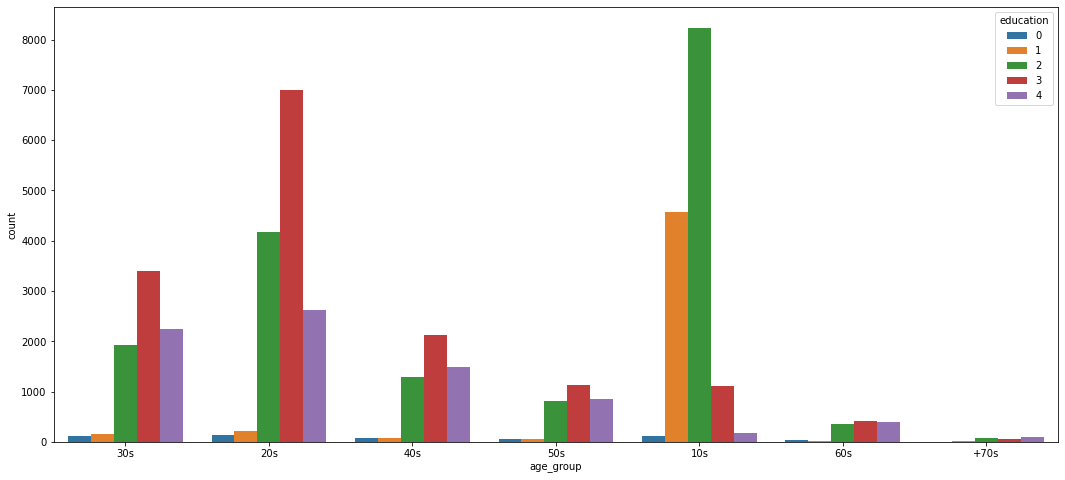

In [127]:
plt.subplots(figsize=(18,8))
sns.countplot('age_group',hue='education',data=data)
plt.show()

10대들은 나이때문에 학사비율이 매우 낮았고, 70대는 사회적환경때문인지 학사비율이 낮았다.

In [128]:
pd.crosstab(data.married,data.education,margins=True).style.background_gradient(cmap='summer_r')

education,0,1,2,3,4,All
married,,,,,,
1,308,4852,13165,9524,3767,31616
2,167,132,2416,4203,3168,10086
3,53,104,1254,1500,919,3830
All,528,5088,16835,15227,7854,45532


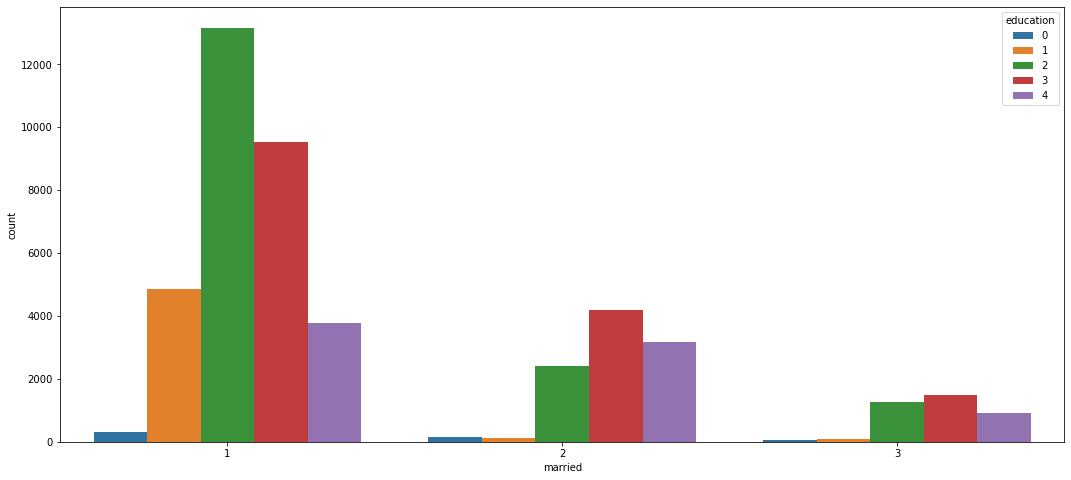

In [129]:
plt.subplots(figsize=(18,8))
sns.countplot('married',hue='education',data=data)
plt.show()

In [130]:
education=data[['education','wf_01','wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']]

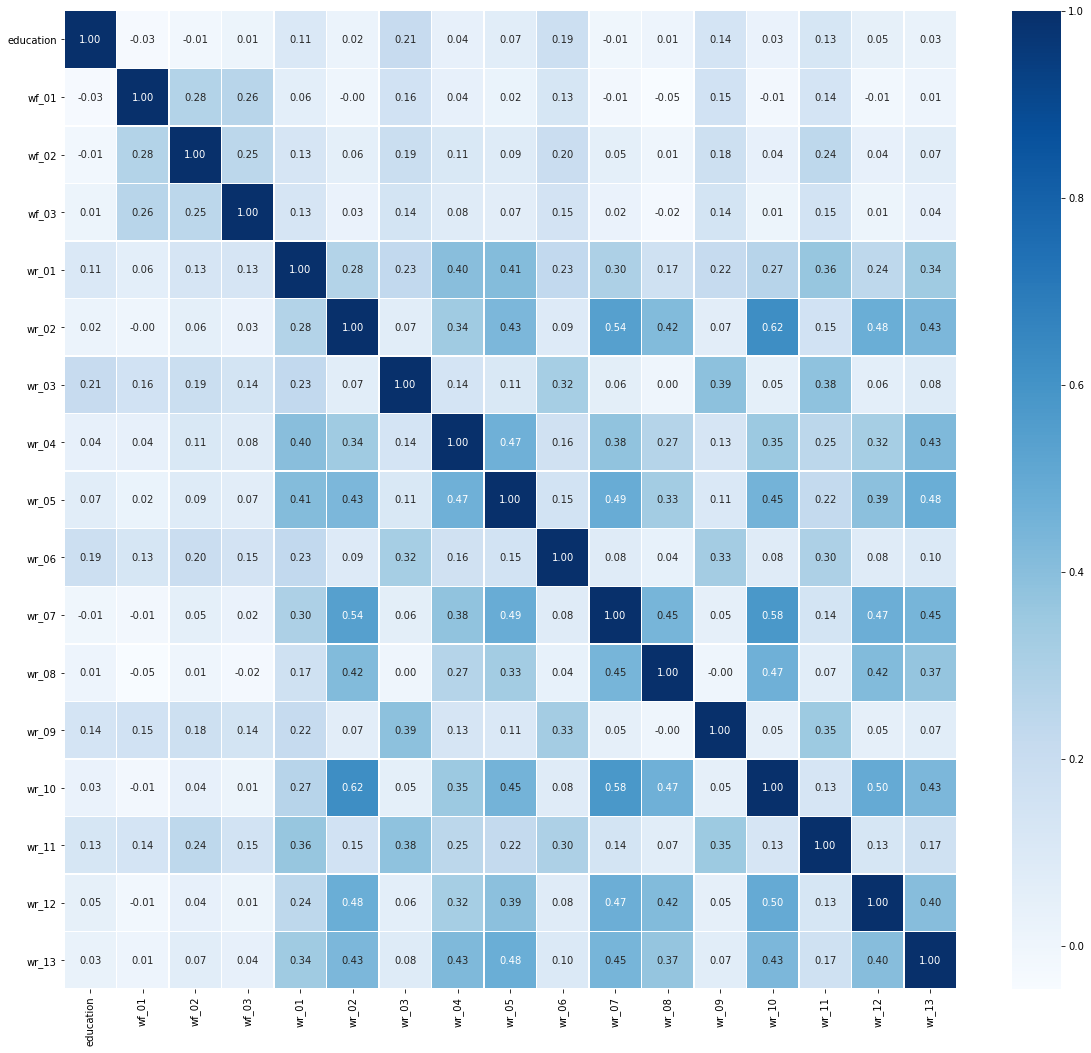

In [131]:
sns.heatmap(data=education.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

wr_03문항에서 약한 상관관계를 보인다

In [132]:
education=data[['education','QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE']]

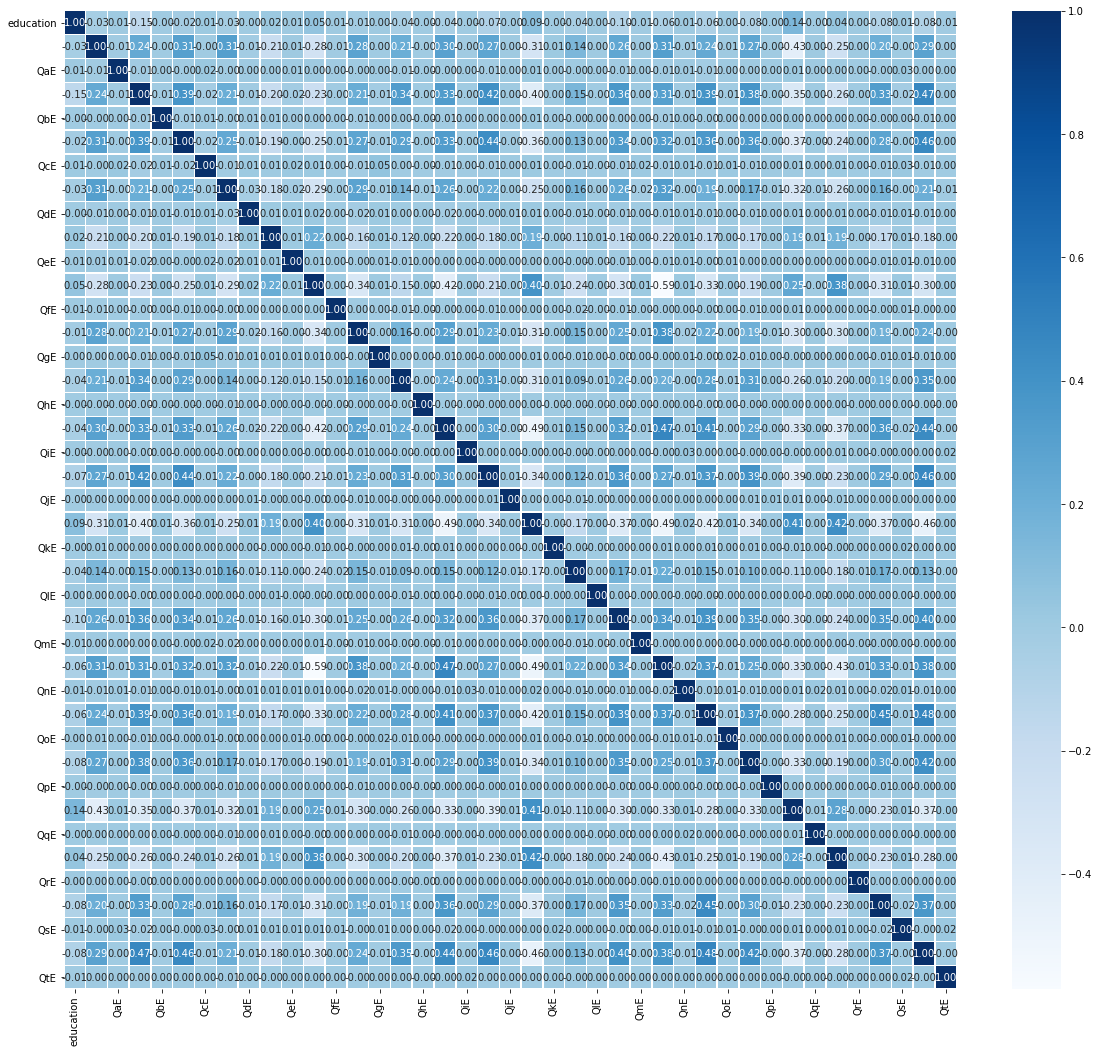

In [133]:
sns.heatmap(data=education.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

In [134]:
education=data[['education','tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 'tp08', 'tp09', 'tp10']]

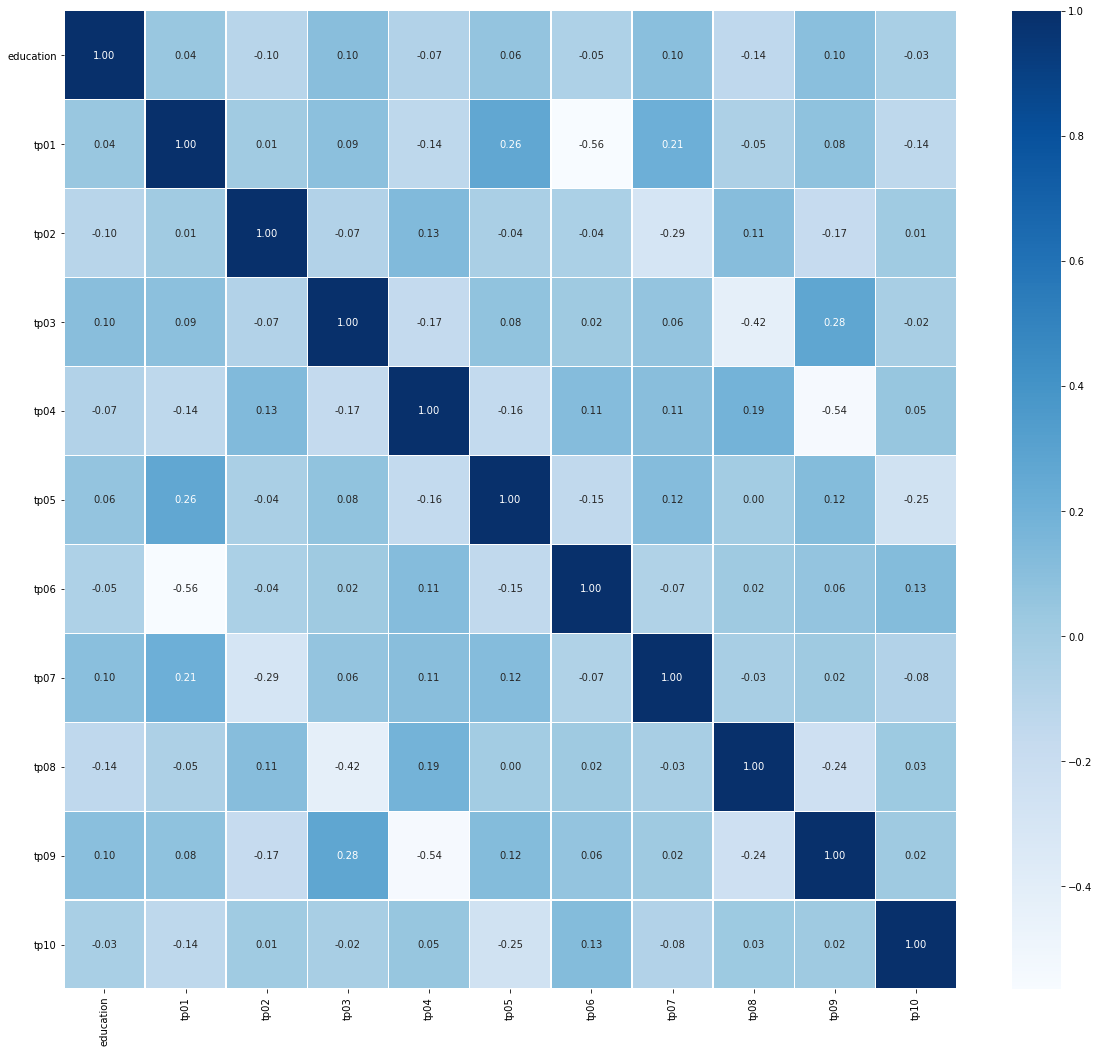

In [135]:
sns.heatmap(data=education.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

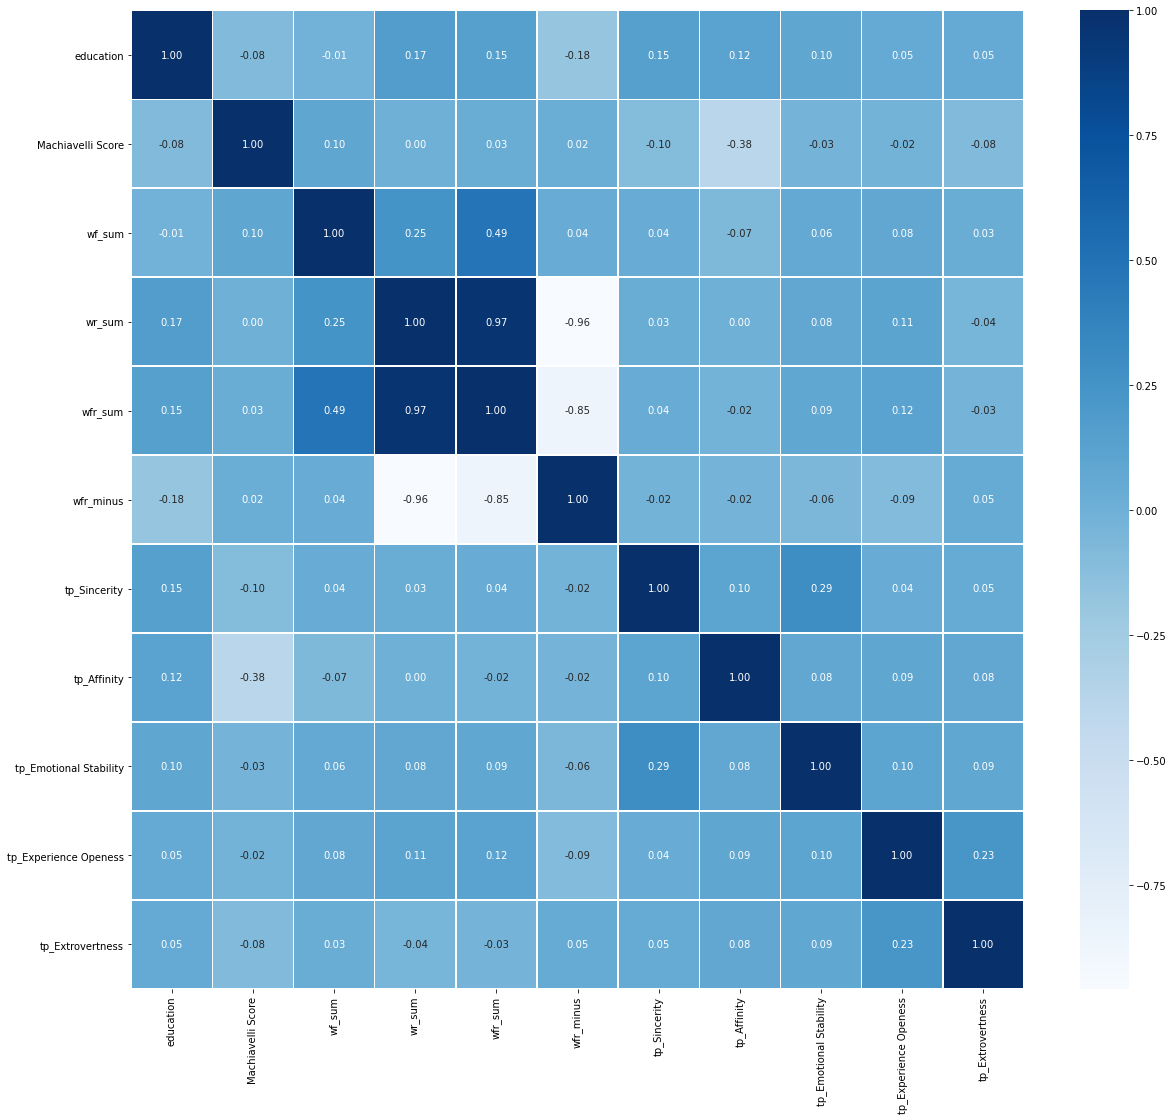

In [136]:
education=data[['education','Machiavelli Score', 'wf_sum', 'wr_sum', 'wfr_sum', 'wfr_minus',
       'tp_Sincerity', 'tp_Affinity', 'tp_Emotional Stability',
       'tp_Experience Openess', 'tp_Extrovertness']]

sns.heatmap(data=education.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

education은 연령변수 및 married 말고는 큰 상관은 없어보인다. 10대중 중학생 고등학생은 어떻게 분리할까?

In [137]:
ten=data[(data['age_group'] == '10s')]
ten['age_group'].replace(['10s','20s','30s','40s','50s','60s','+70s'],[1,2,3,4,5,6,7],inplace=True)
ten['gender'].replace(['Male','Female'],[1,2],inplace=True)

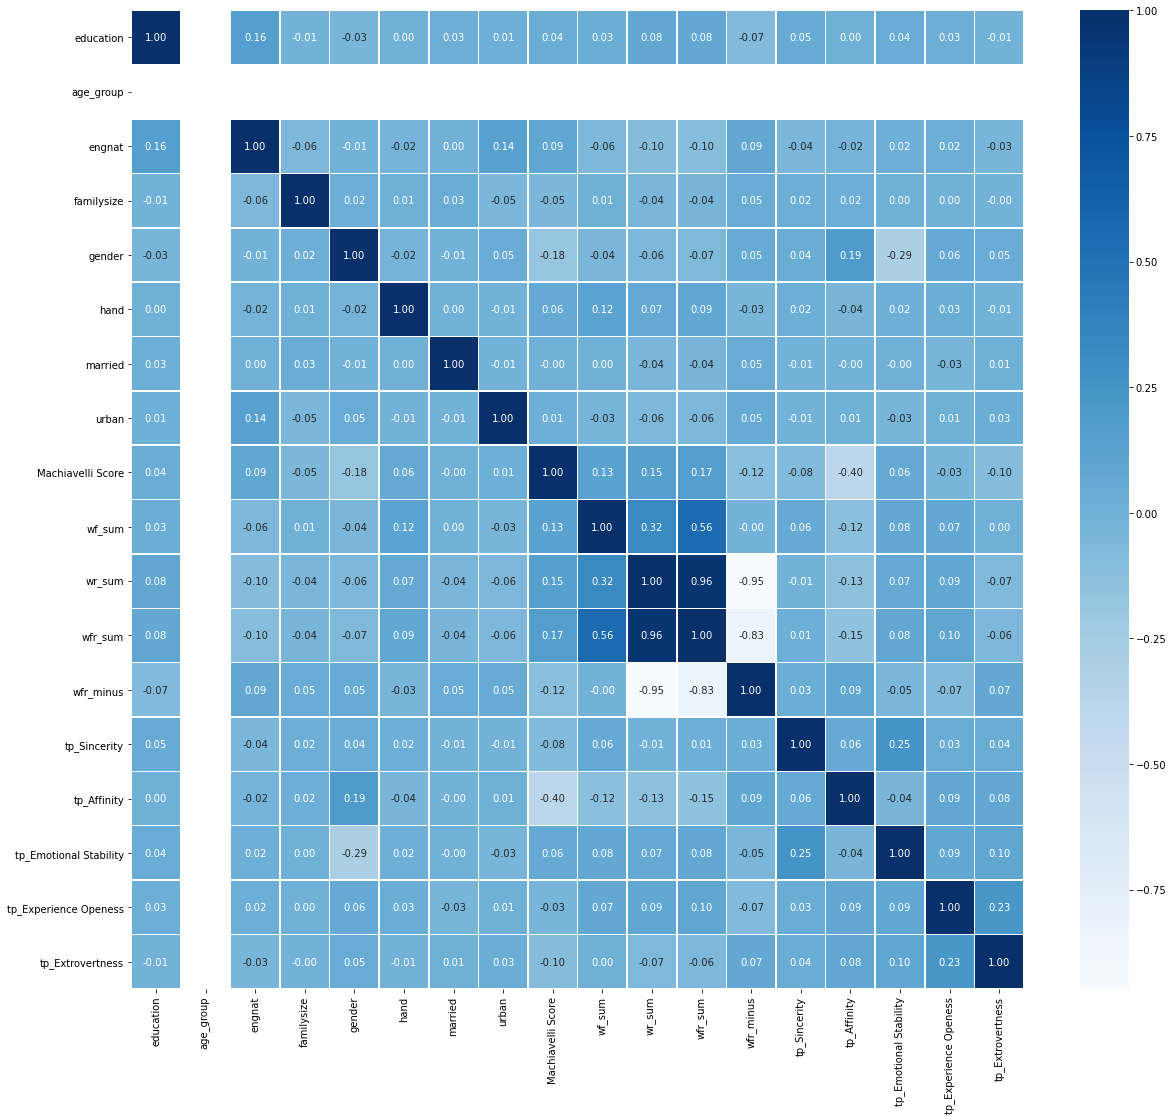

In [138]:
ten1=ten.loc[:,['education', 'age_group', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion','urban','Machiavelli Score', 'wf_sum', 'wr_sum', 'wfr_sum', 'wfr_minus',
       'tp_Sincerity', 'tp_Affinity', 'tp_Emotional Stability',
       'tp_Experience Openess', 'tp_Extrovertness']]

sns.heatmap(data=ten1.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

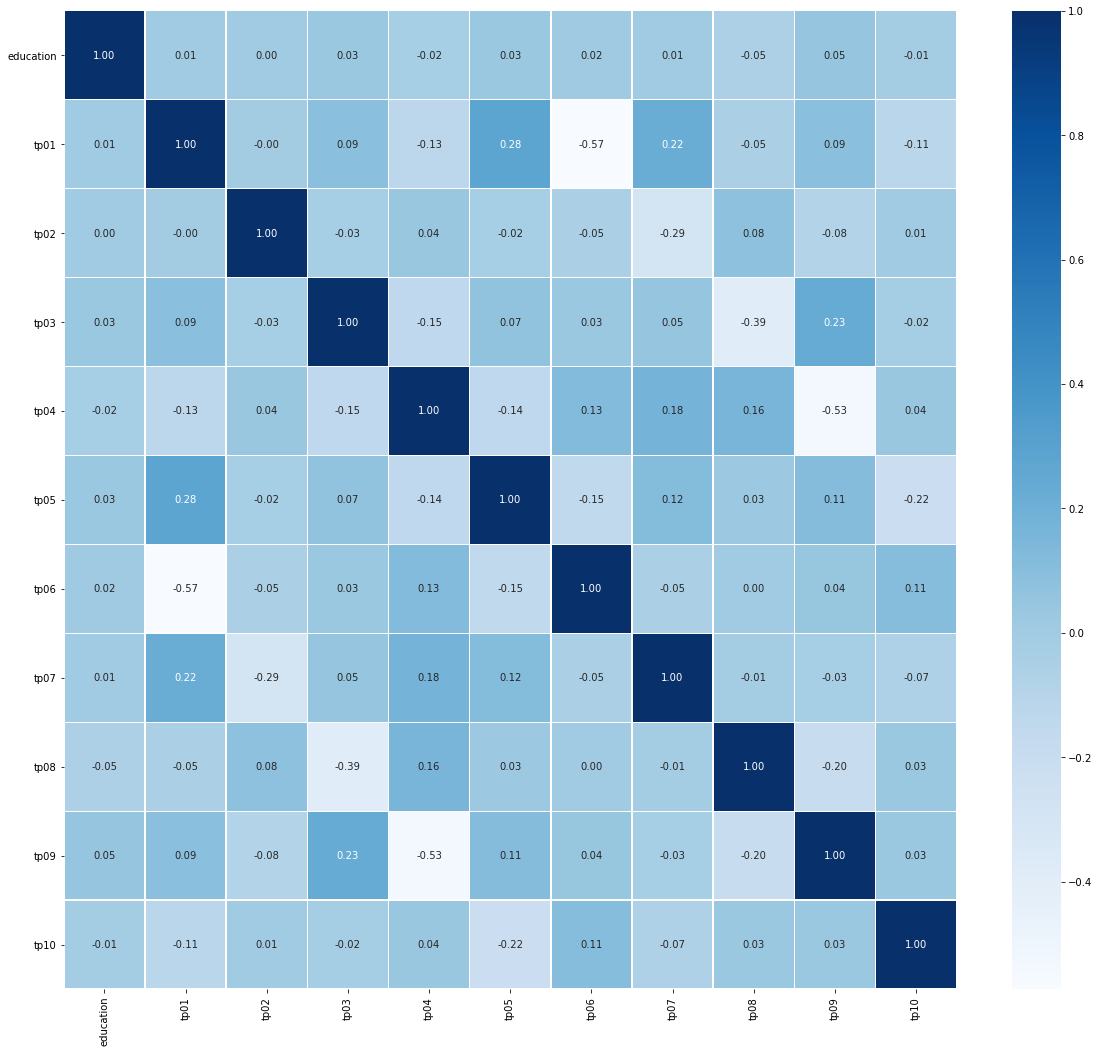

In [139]:
ten2=ten[['education','tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 'tp08', 'tp09', 'tp10']]

sns.heatmap(data=ten2.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

tp가 성향을 나타내기때문에 흑염룡이 자라는 중2병인 아이들을 추려낼수있을줄 알았는데ㅠㅠ 안되네

그럼 지식수준으로 가즈아!!!

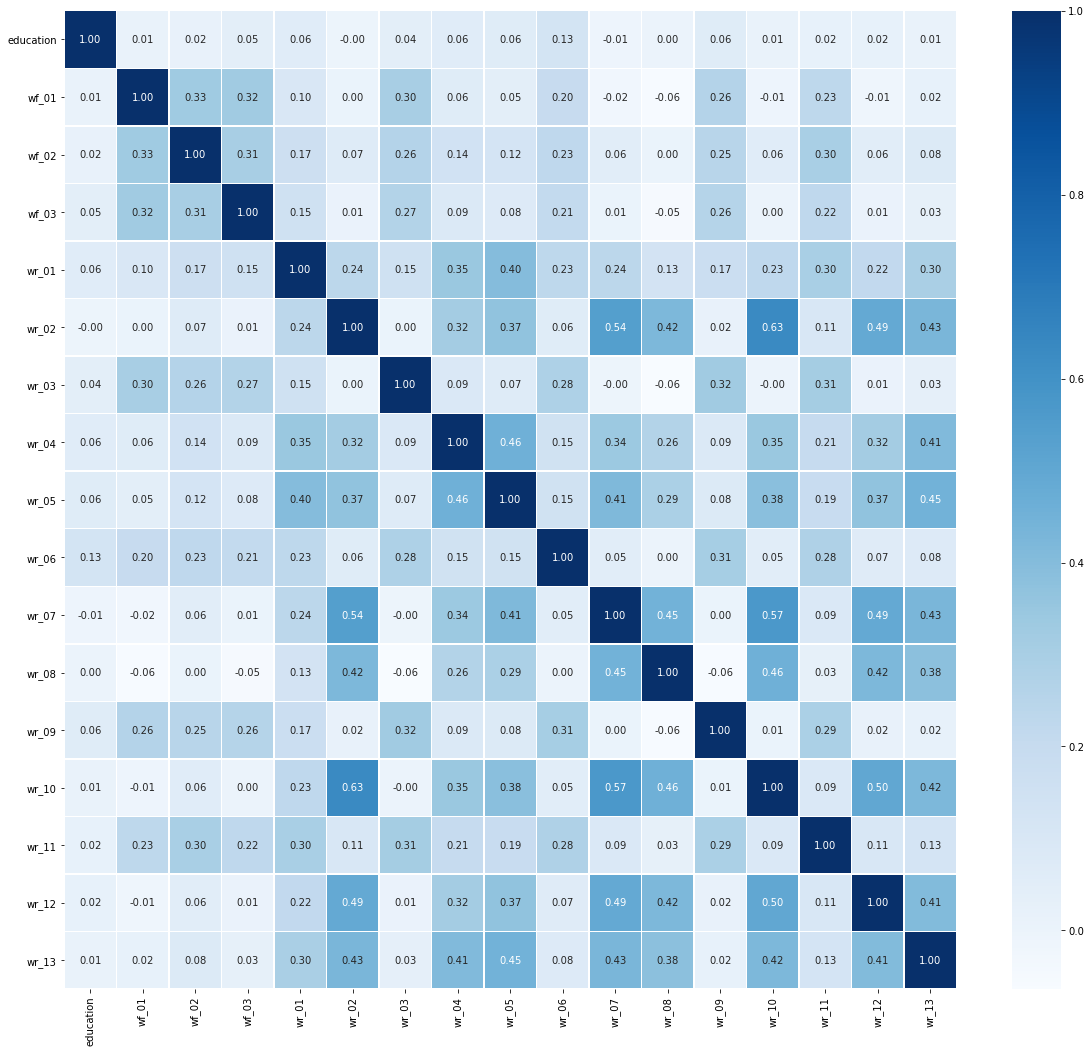

In [140]:
ten3=ten[['education','wf_01','wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']]

sns.heatmap(data=ten3.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

지식수준으로도 나눌수 없었다고 한다... 0.13은 그렇게 큰 숫자가 아니므로 패스

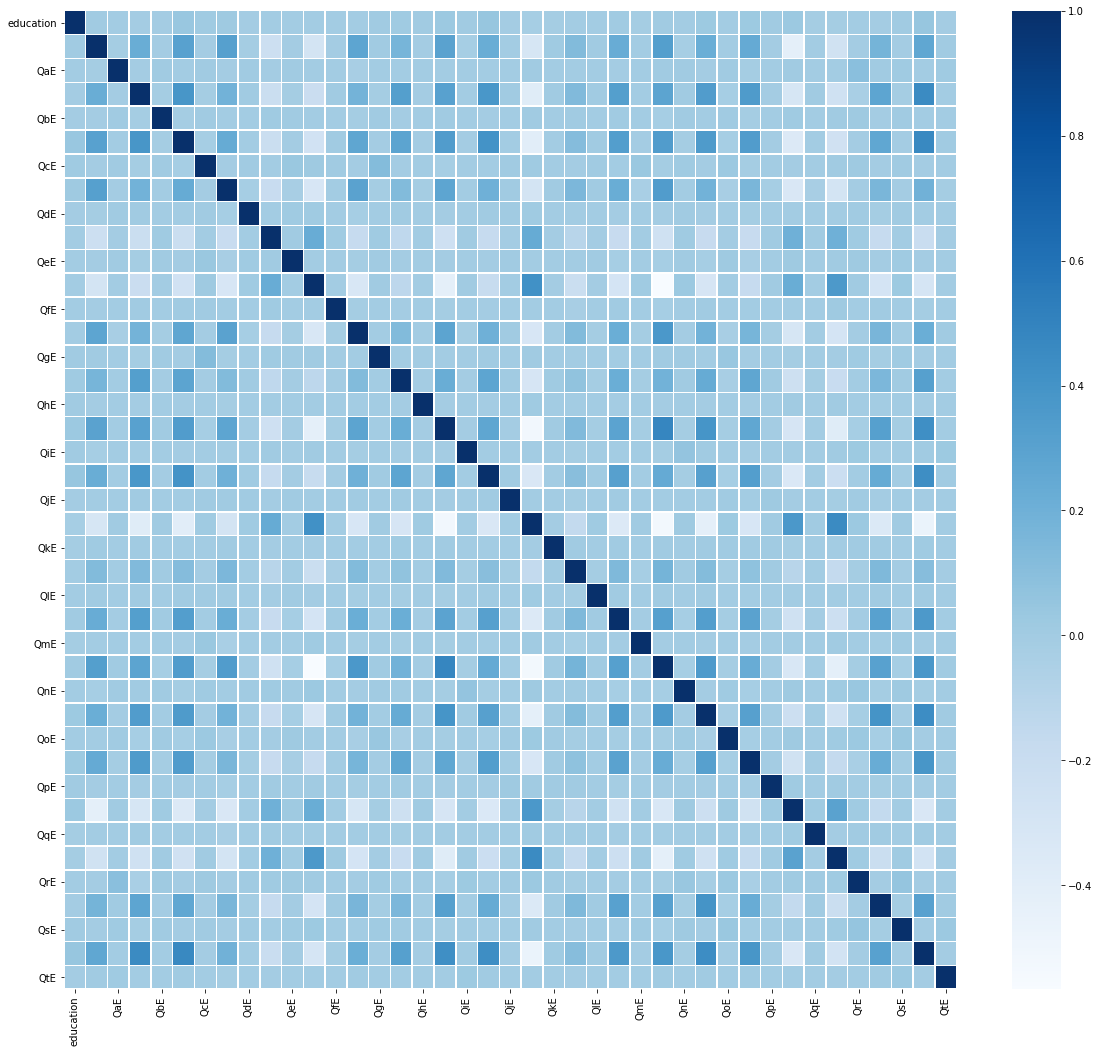

In [141]:
ten4=ten[['education','QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE']]

sns.heatmap(data=ten4.corr(),annot=False,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

그래도 그 중에 상관이 가장 높은 wr_06을 다시보자 (모국어가 영어인지 아닌지는 상관이 0.16이긴 한데 학력과는 설명이 안되므로 패스)

In [142]:
pd.crosstab(ten3.wr_06,ten3.education,margins=True).style.background_gradient(cmap='summer_r')

education,0,1,2,3,4,All
wr_06,,,,,,
0,86,3743,5983,654,123,10589
1,29,830,2256,460,51,3626
All,115,4573,8239,1114,174,14215


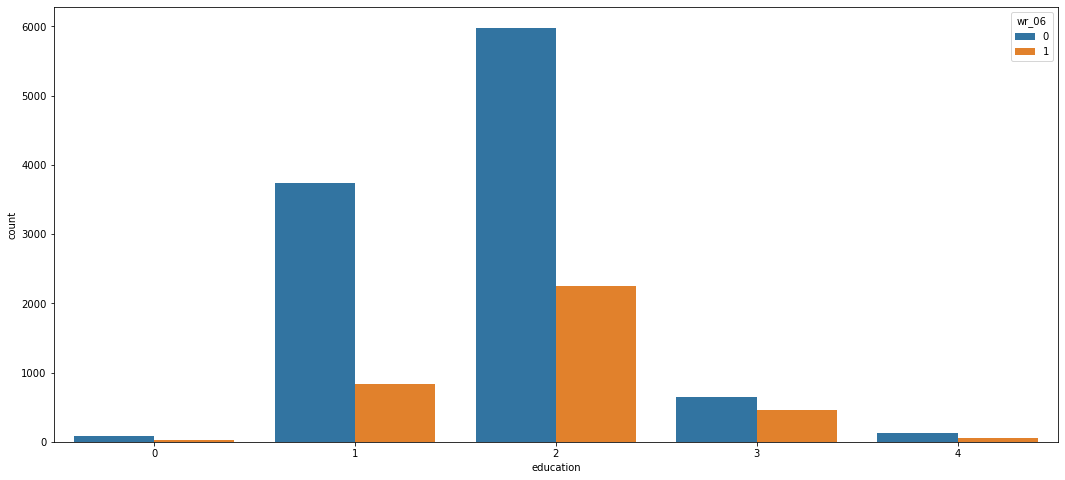

In [143]:
plt.subplots(figsize=(18,8))
sns.countplot('education',hue='wr_06',data=ten3)
plt.show()

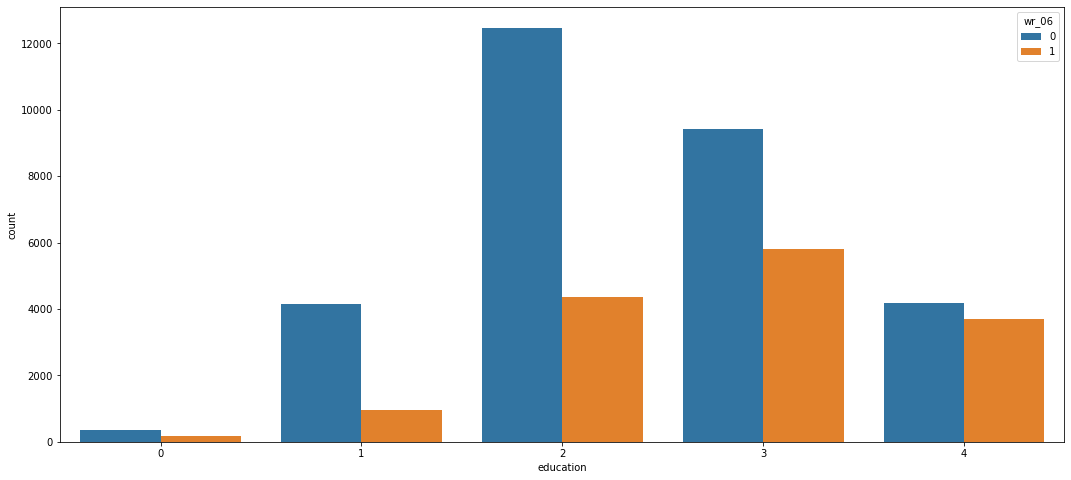

In [144]:
plt.subplots(figsize=(18,8))
sns.countplot('education',hue='wr_06',data=data)
plt.show()

학력이 높아질수록 wr_06을 아는 비율이 점점 늘어나고 있다. 이는 10대에서도 비슷한 양상을 보이고 있다.

In [145]:
pd.crosstab([ten.married,ten.wr_06],ten.education,margins=True).style.background_gradient(cmap='summer_r')

In [146]:
data[(data['age_group'] == '10s') & (data['wr_06'] == 0)] = data[(data['age_group'] == '10s') & (data['wr_06'] == 0)].replace({'education': 0}, {'education': 1})
data[(data['age_group'] == '10s') & (data['wr_06'] == 1)] = data[(data['age_group'] == '10s') & (data['wr_06'] == 1)].replace({'education': 0}, {'education': 2})

In [147]:
test[(test['age_group'] == '10s') & (test['wr_06'] == 0)] = test[(test['age_group'] == '10s') & (test['wr_06'] == 0)].replace({'education': 0}, {'education': 1})
test[(test['age_group'] == '10s') & (test['wr_06'] == 1)] = test[(test['age_group'] == '10s') & (test['wr_06'] == 1)].replace({'education': 0}, {'education': 2})

In [148]:
twe=data[(data['age_group'] == '20s')]
twe['gender'].replace(['Male','Female'],[1,2],inplace=True)

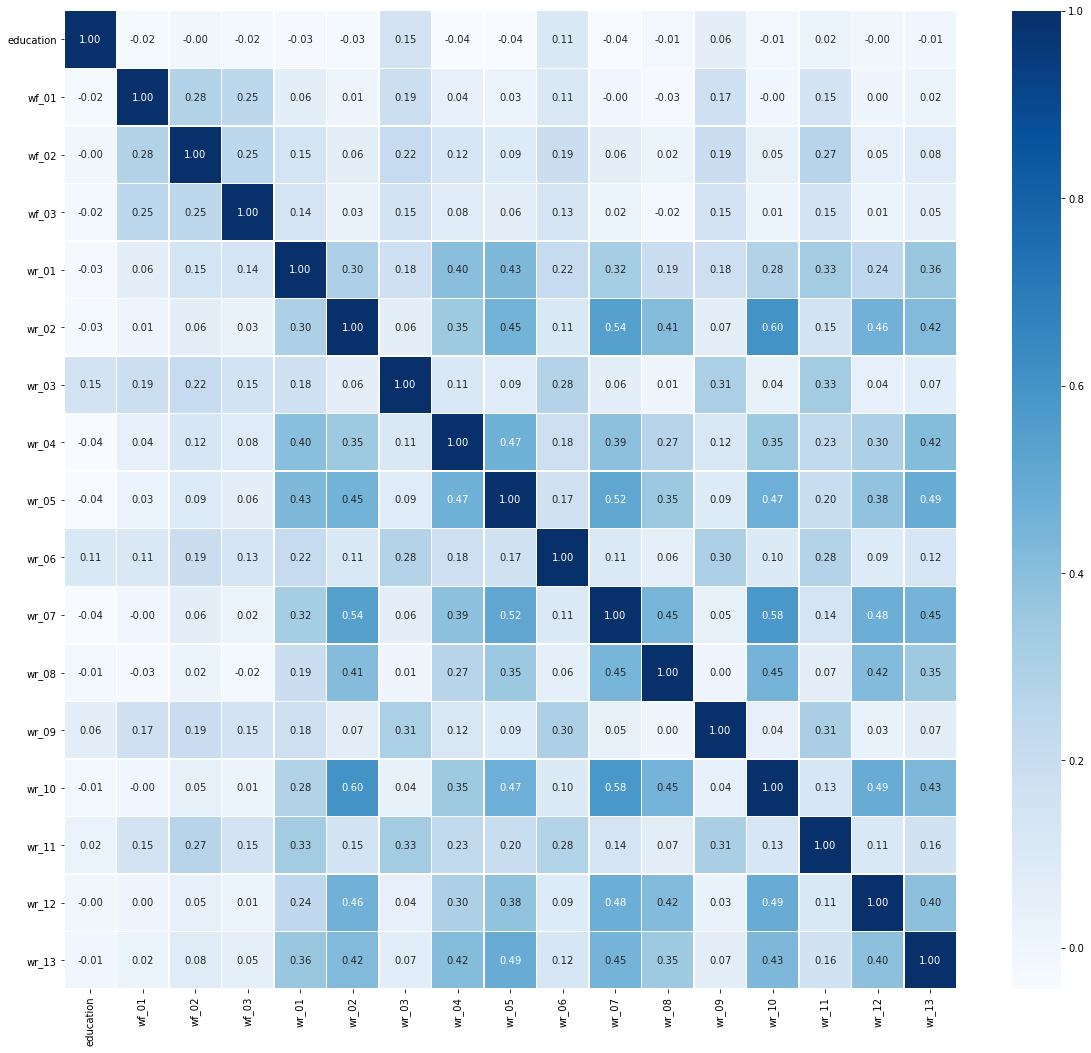

In [149]:
twe1=twe[['education','wf_01','wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']]

sns.heatmap(data=twe1.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

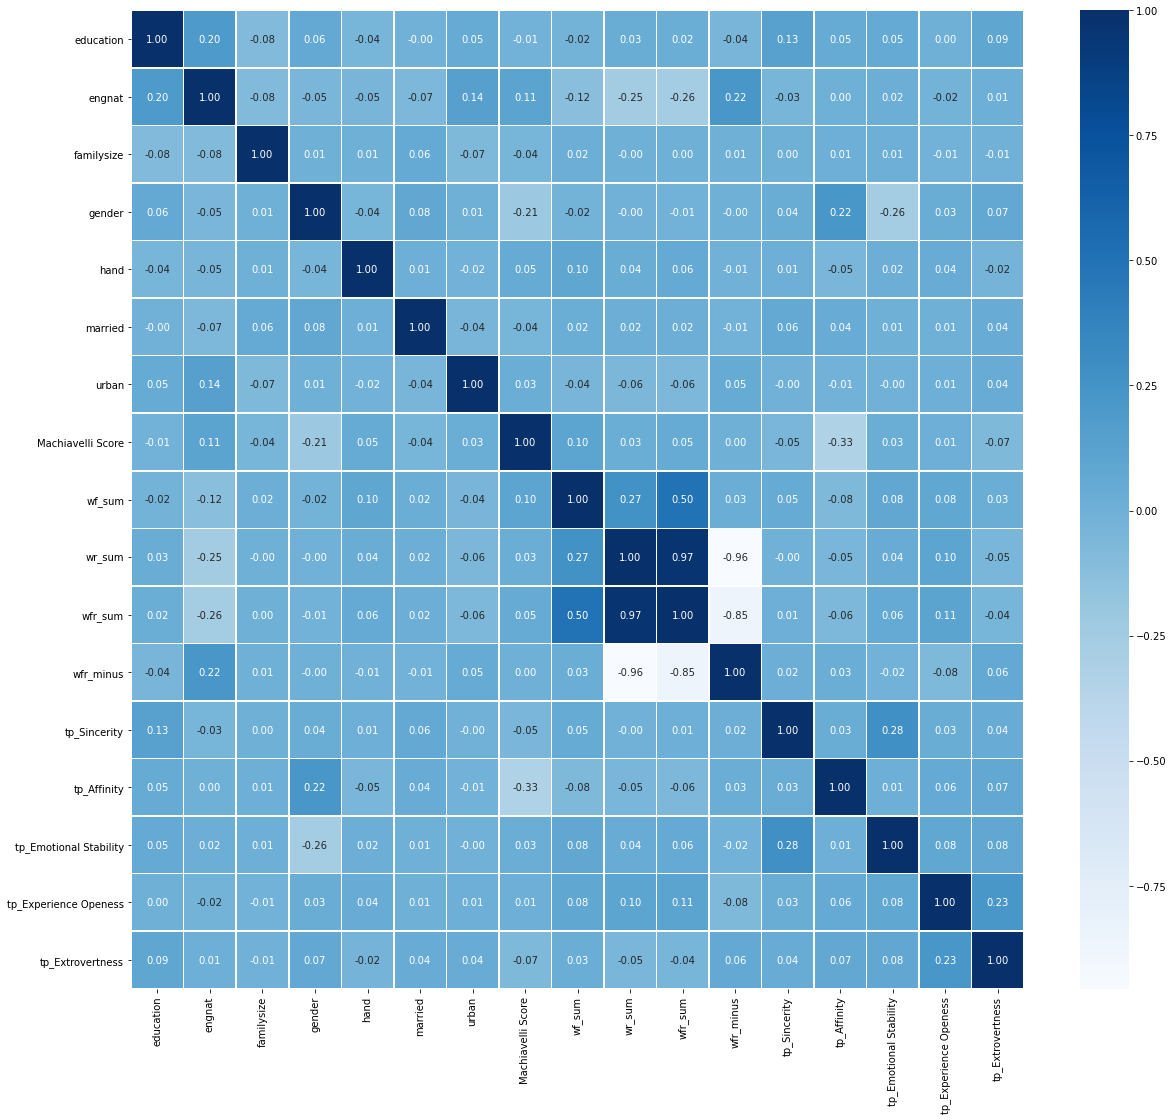

In [150]:
twe2=twe.loc[:,['education', 'age_group', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion','urban','Machiavelli Score', 'wf_sum', 'wr_sum', 'wfr_sum', 'wfr_minus',
       'tp_Sincerity', 'tp_Affinity', 'tp_Emotional Stability',
       'tp_Experience Openess', 'tp_Extrovertness']]

sns.heatmap(data=twe2.corr(),annot=True,fmt='.2f', linewidths=.5,cmap='Blues')

fig=plt.gcf() # fig에 접근
fig.set_size_inches(20,18) # fig그림 크기 조절
plt.show()

In [151]:
pd.crosstab(twe1.wr_03,twe1.education,margins=True).style.background_gradient(cmap='summer_r')

education,0,1,2,3,4,All
wr_03,,,,,,
0,111,177,3736,5812,1854,11690
1,23,30,429,1180,760,2422
All,134,207,4165,6992,2614,14112


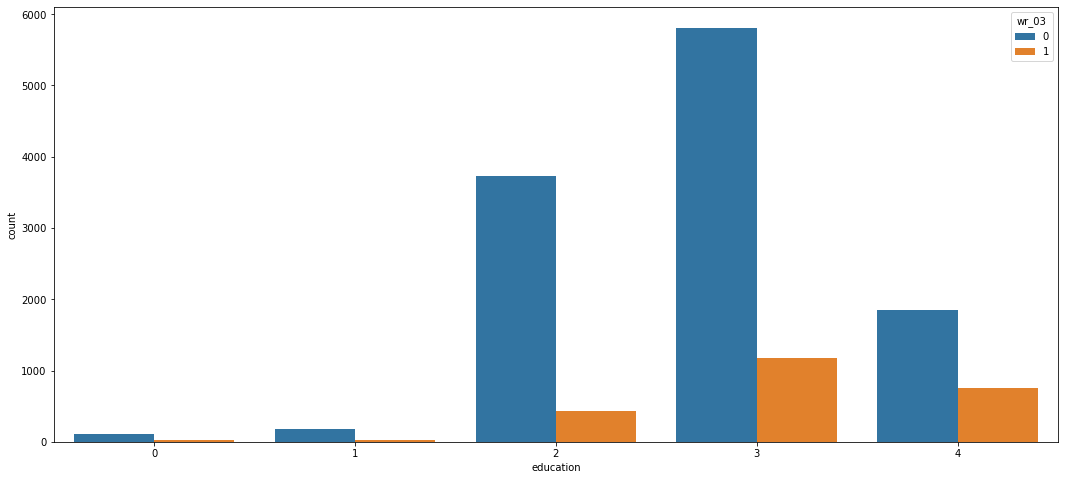

In [152]:
plt.subplots(figsize=(18,8))
sns.countplot('education',hue='wr_03',data=twe1)
plt.show()

큰 차이를 보이지 않는다

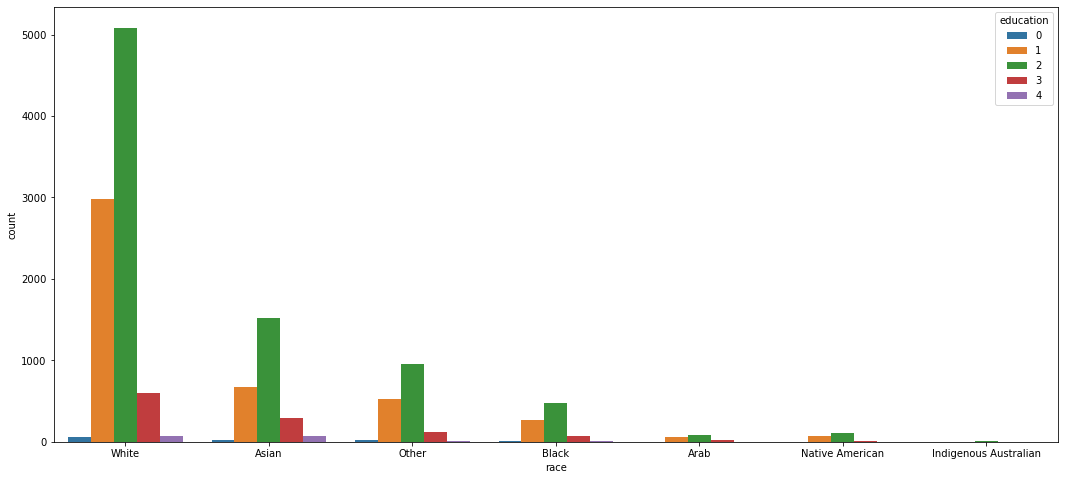

In [153]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='education',data=train[train.age_group=='10s'])
plt.show()

10대는 전체적으로 비슷한경향을 띔

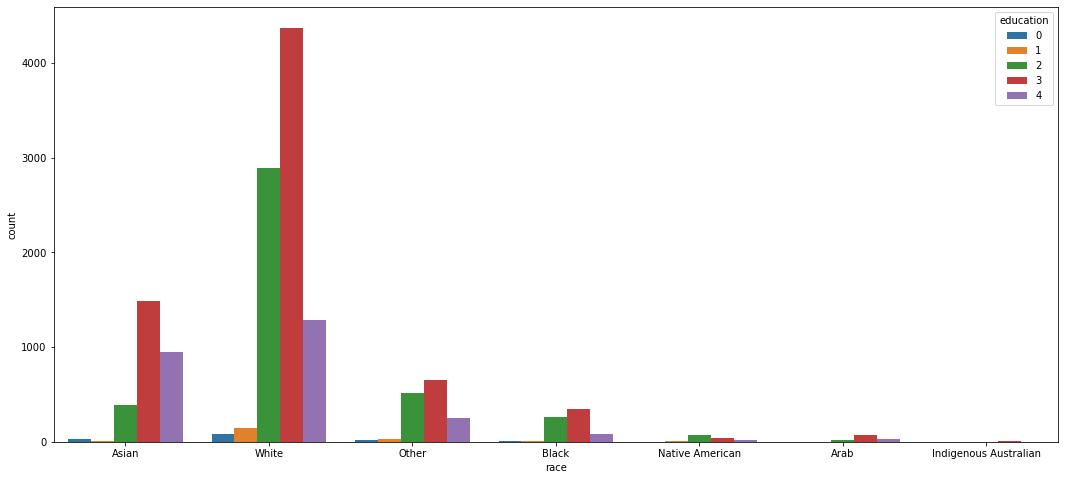

In [154]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='education',data=train[train.age_group=='20s'])
plt.show()

20대 Native American은 대학진항률이 낮고 asian은 대학진학률이 다른 인종에 비해 월등히 높다. 하지만 인종으로 교육수준을 판단할수는 없기에 다른 지표를 살펴본다

In [155]:
pd.crosstab(twe.race,twe.education,margins=True).style.background_gradient(cmap='summer_r')

education,0,1,2,3,4,All
race,,,,,,
Arab,1,1,24,70,31,127
Asian,31,13,393,1491,945,2873
Black,4,10,263,345,84,706
Indigenous Australian,0,1,3,11,2,17
Native American,0,5,71,44,19,139
Other,19,30,519,657,251,1476
White,79,147,2892,4374,1282,8774
All,134,207,4165,6992,2614,14112


In [156]:
pd.crosstab([twe.race ,twe.engnat],twe.education,margins=True).style.background_gradient(cmap='summer_r')

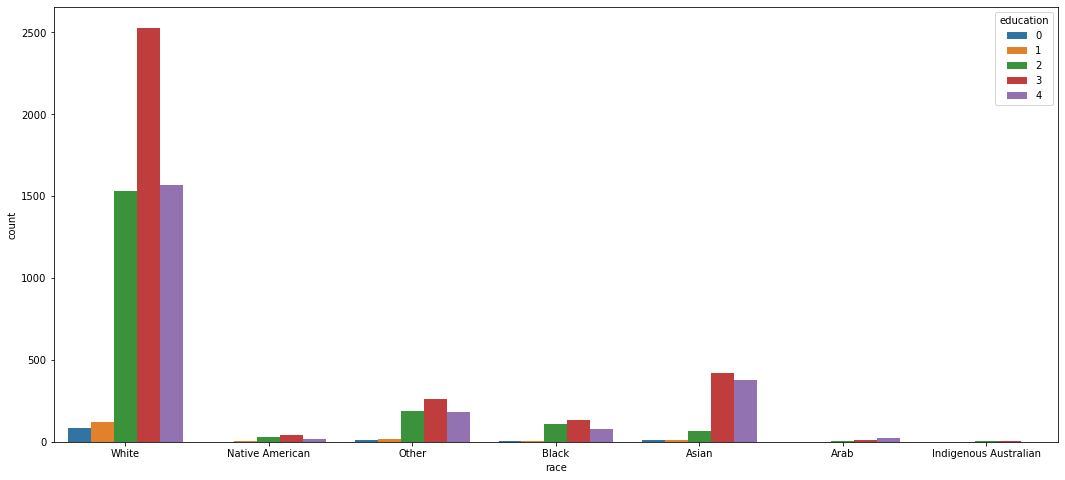

In [157]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='education',data=train[train.age_group=='30s'])
plt.show()

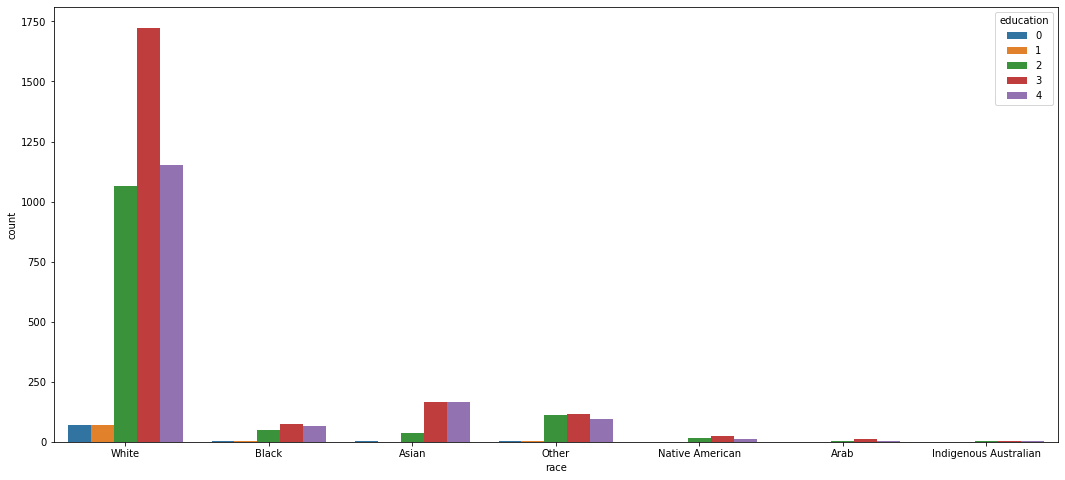

In [158]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='education',data=train[train.age_group=='40s'])
plt.show()

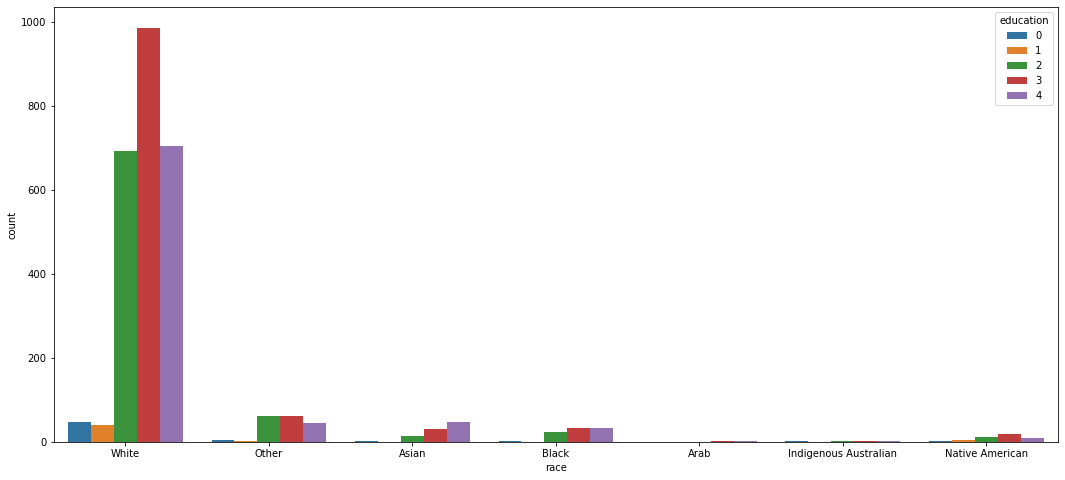

In [159]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='education',data=train[train.age_group=='50s'])
plt.show()

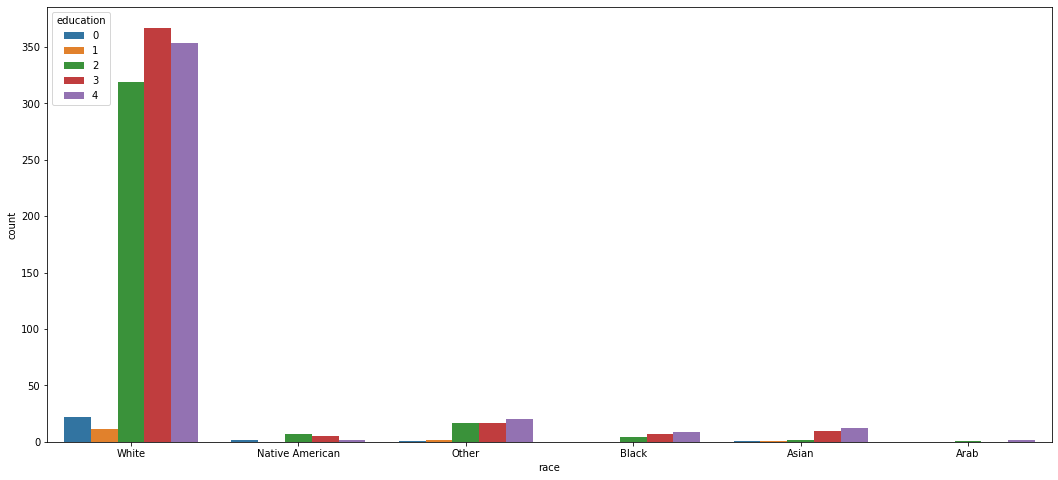

In [160]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='education',data=train[train.age_group=='60s'])
plt.show()

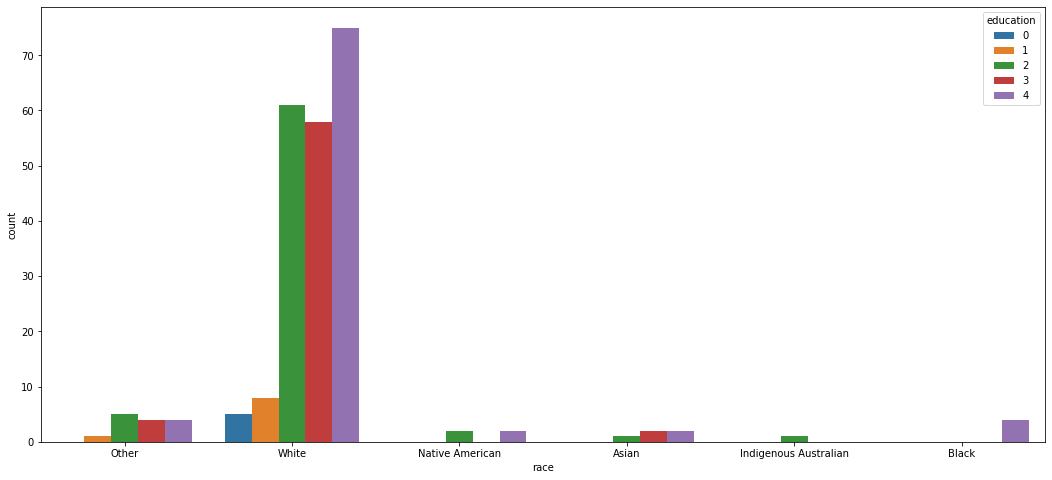

In [161]:
plt.subplots(figsize=(18,8))
sns.countplot('race',hue='education',data=train[train.age_group=='+70s'])
plt.show()

각 연령대 별로 비슷한 패턴을 띄고 있고 인종으로 교육수준을 나누기에는 큰 무리가 있어보인다

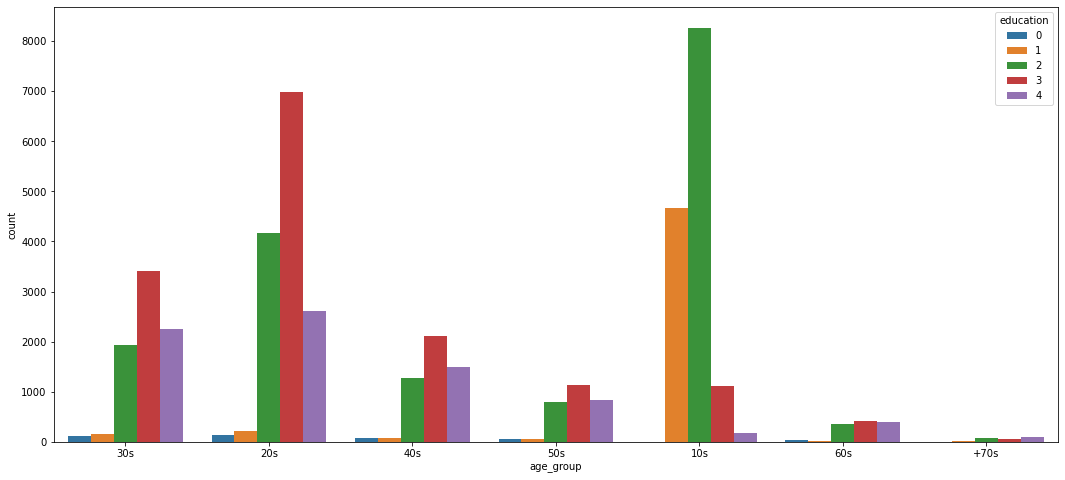

In [162]:
plt.subplots(figsize=(18,8))
sns.countplot('age_group',hue='education',data=data)
plt.show()

In [163]:
pd.crosstab(data.wfr_minus,train.education,margins=True).style.background_gradient(cmap='summer_r')

education,0,1,2,3,4,All
wfr_minus,,,,,,
-13,23,40,260,627,750,1700
-12,36,95,588,1143,973,2835
-11,74,246,1496,1955,1271,5042
-10,99,757,3173,3316,1501,8846
-9,115,1320,4862,3710,1363,11370
-8,83,1152,3219,2180,807,7441
-7,38,617,1514,929,437,3535
-6,21,339,652,413,235,1660
-5,13,155,320,222,143,853


wfr_minus와 education은 음의 상관을 가지고 wfr_minus의 값이 낮을수록 education이 4인 비율이 늘어나고 있으므로 -13일때는 모두 4로 바꾸어주자 (10대가 대학원을 간다는것은 이상치로 간주할수있으므로 앞에서 처리해주었다.)

In [164]:
data[(data['wfr_minus'] == -13.0) & (data['education'] == 0)] = data[(data['wfr_minus'] == -13.0) & (data['education'] == 0)].replace({'education': 0}, {'education': 4})

In [165]:
test[(test['wfr_minus'] == -13.0) & (test['education'] == 0)] = test[(test['wfr_minus'] == -13.0) & (test['education'] == 0)].replace({'education': 0}, {'education': 4})

In [166]:
pd.crosstab(data.age_group,data.education,margins=True).style.background_gradient(cmap='summer_r')

education,0,1,2,3,4,All
age_group,,,,,,
+70s,3,9,70,64,89,235
10s,0,4659,8268,1114,174,14215
20s,134,207,4165,6992,2614,14112
30s,106,157,1925,3401,2247,7836
40s,76,80,1282,2116,1497,5051
50s,51,48,804,1134,852,2889
60s,21,14,350,406,403,1194
All,391,5174,16864,15227,7876,45532


나머지 무응답은 상관관계가 가장 높았던 연령변수의 최빈값에 넣는다.

In [167]:
data[(data['age_group'] == '10s') & (data['education'] == 0)] = data[(data['age_group'] == '10s') & (data['education'] == 0)].replace({'education': 0}, {'education': 2})
data[(data['age_group'] == '20s') & (data['education'] == 0)] = data[(data['age_group'] == '20s') & (data['education'] == 0)].replace({'education': 0}, {'education': 3})
data[(data['age_group'] == '30s') & (data['education'] == 0)] = data[(data['age_group'] == '30s') & (data['education'] == 0)].replace({'education': 0}, {'education': 3})
data[(data['age_group'] == '40s') & (data['education'] == 0)] = data[(data['age_group'] == '40s') & (data['education'] == 0)].replace({'education': 0}, {'education': 3})
data[(data['age_group'] == '50s') & (data['education'] == 0)] = data[(data['age_group'] == '50s') & (data['education'] == 0)].replace({'education': 0}, {'education': 3})
data[(data['age_group'] == '60s') & (data['education'] == 0)] = data[(data['age_group'] == '60s') & (data['education'] == 0)].replace({'education': 0}, {'education': 3})
data[(data['age_group'] == '+70s') & (data['education'] == 0)] = data[(data['age_group'] == '+70s') & (data['education'] == 0)].replace({'education': 0}, {'education': 4})

In [168]:
test[(test['age_group'] == '10s') & (test['education'] == 0)] = test[(test['age_group'] == '10s') & (test['education'] == 0)].replace({'education': 0}, {'education': 2})
test[(test['age_group'] == '20s') & (test['education'] == 0)] = test[(test['age_group'] == '20s') & (test['education'] == 0)].replace({'education': 0}, {'education': 3})
test[(test['age_group'] == '30s') & (test['education'] == 0)] = test[(test['age_group'] == '30s') & (test['education'] == 0)].replace({'education': 0}, {'education': 3})
test[(test['age_group'] == '40s') & (test['education'] == 0)] = test[(test['age_group'] == '40s') & (test['education'] == 0)].replace({'education': 0}, {'education': 3})
test[(test['age_group'] == '50s') & (test['education'] == 0)] = test[(test['age_group'] == '50s') & (test['education'] == 0)].replace({'education': 0}, {'education': 3})
test[(test['age_group'] == '60s') & (test['education'] == 0)] = test[(test['age_group'] == '60s') & (test['education'] == 0)].replace({'education': 0}, {'education': 3})
test[(test['age_group'] == '+70s') & (test['education'] == 0)] = test[(test['age_group'] == '+70s') & (test['education'] == 0)].replace({'education': 0}, {'education': 4})

In [169]:
print(data.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 87 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   QaA                     45532 non-null  float64
 1   QaE                     45532 non-null  int64  
 2   QbA                     45532 non-null  float64
 3   QbE                     45532 non-null  int64  
 4   QcA                     45532 non-null  float64
 5   QcE                     45532 non-null  int64  
 6   QdA                     45532 non-null  float64
 7   QdE                     45532 non-null  int64  
 8   QeA                     45532 non-null  float64
 9   QeE                     45532 non-null  int64  
 10  QfA                     45532 non-null  float64
 11  QfE                     45532 non-null  int64  
 12  QgA                     45532 non-null  float64
 13  QgE                     45532 non-null  int64  
 14  QhA                     45532 non-null

In [170]:
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,Machiavelli Score,wf_sum,wr_sum,wfr_sum,wfr_minus,tp_Sincerity,tp_Affinity,tp_Emotional Stability,tp_Experience Openess,tp_Extrovertness
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,2.0,1577,...,2.95,0,7,7,-7,5.0,4.0,2.5,4.5,3.5
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,1.0,4320,...,2.60,0,8,8,-8,6.0,3.0,4.0,5.5,4.5
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,5.0,1333,...,2.40,1,10,11,-9,6.5,4.5,6.0,4.0,5.0
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,3.15,0,5,5,-5,5.0,5.5,4.0,5.0,4.5
4,5.0,927,1.0,707,5.0,556,4.0,1062,1.0,1014,...,3.30,1,11,12,-10,6.5,4.5,6.0,7.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.0,1050,5.0,619,4.0,328,5.0,285,1.0,602,...,3.55,1,10,11,-9,1.0,3.5,1.5,5.0,6.5
45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,1680,...,3.50,1,11,12,-10,5.0,3.5,5.0,6.0,4.5
45529,2.0,593,1.0,857,1.0,1047,2.0,1515,5.0,1690,...,2.40,0,9,9,-9,4.0,6.0,5.5,7.0,2.5


In [171]:
test

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,Machiavelli Score,wf_sum,wr_sum,wfr_sum,wfr_minus,tp_Sincerity,tp_Affinity,tp_Emotional Stability,tp_Experience Openess,tp_Extrovertness
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,736.0,2.0,2941.0,3.0,4621.0,5.0,4857.0,2.0,2550.0,...,2.75,0.0,6.0,6.0,-6.0,5.0,3.5,4.0,5.5,4.0
1,3.0,514.0,2.0,1952.0,3.0,1552.0,3.0,821.0,4.0,1150.0,...,3.20,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0
2,3.0,500.0,2.0,2507.0,4.0,480.0,4.0,614.0,2.0,1326.0,...,3.55,0.0,7.0,7.0,-7.0,3.5,4.0,2.0,1.5,1.5
3,5.0,669.0,1.0,1050.0,5.0,1435.0,4.0,2252.0,5.0,2533.0,...,3.35,0.0,13.0,13.0,-13.0,6.0,6.5,6.5,7.0,7.0
4,4.0,499.0,1.0,1243.0,5.0,845.0,4.0,1666.0,2.0,925.0,...,3.00,0.0,10.0,10.0,-10.0,4.0,2.0,3.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1.0,427.0,5.0,1066.0,5.0,588.0,5.0,560.0,2.0,1110.0,...,3.10,0.0,9.0,9.0,-9.0,4.0,3.5,3.5,6.5,5.5
11379,5.0,314.0,5.0,554.0,5.0,230.0,5.0,956.0,2.0,1173.0,...,3.85,2.0,13.0,15.0,-11.0,3.0,4.0,1.0,6.0,6.0
11380,5.0,627.0,2.0,799.0,1.0,739.0,4.0,1123.0,1.0,829.0,...,2.75,2.0,10.0,12.0,-8.0,6.5,4.5,7.0,6.0,3.0


In [173]:
data.to_csv(r"dacon_train.csv", index=False)
test.to_csv(r"dacon_test.csv", index=False)

------------------------------------

여기 분류모델에서 knn을 사용하여 결측치를 사용할수있지만 복잡하여 그 데이터가 연속형일때 사용하기 좋은 imputer를 소개합니다

In [175]:
train=pd.read_csv('open data/train.csv', index_col=0)
test=pd.read_csv('open data/test_x.csv', index_col=0)
submission=pd.read_csv('open data/sample_submission.csv', index_col=0)  

In [176]:
train_f=train.drop(['voted'],axis=1)

In [177]:
total = pd.concat([train_f,test],axis=0,ignore_index=True)
total

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,1,0,1,1,0,1,0,1,1
56911,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,1
56912,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,1,0,1,1,0,1,0,1,1
56913,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,...,1,0,0,1,1,0,1,1,1,0


In [178]:
total.tp01.value_counts()

1    11242
2     9905
5     9825
6     7516
4     7471
0     5986
3     4623
7      347
Name: tp01, dtype: int64

In [179]:
total.loc[:,['engnat', 'married', 'hand', 'urban', 'education']]=total.loc[:,['engnat', 'married', 'hand', 'urban', 'education']].replace(0, np.nan)

In [180]:
total.loc[:,['tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 'tp08', 'tp09', 'tp10']]=total.loc[:,['tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06', 'tp07', 'tp08', 'tp09', 'tp10']].replace(4, np.nan)

In [181]:
total

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,1,0,1,1,0,1,0,1,1
56911,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,1
56912,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,1,0,1,1,0,1,0,1,1
56913,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,...,1,0,0,1,1,0,1,1,1,0


In [182]:
total=pd.get_dummies(total)

In [ ]:
import missingno as msno

msno.matrix(total)

분명히 낮에는 돌아갔는데 지금은 메모리 문제 때문에 안되네요 허허

In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer() #여기서 분류에 필요한 k값 설정합니다
total_knn = total
total_knn.iloc[:,:] = knn_imputer.fit_transform(total_knn)

In [185]:
# 사이킷런에서 impute 를 하려면 두가지의 매서드를 불러와야 합니다.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer 메서드 사용(verboase=False 는 실행결과를 반복 출력하는 것을 막기위해 설정)

IterativeImputer(verbose = 2).fit_transform(total)
# array 형식으로 출력되는 것을 볼 수 있습니다.
# Numpy의 Array 란?

[IterativeImputer] Completing matrix with shape (56915, 100)
[IterativeImputer] Ending imputation round 1/10, elapsed time 333.55
[IterativeImputer] Change: 1344783.1945461582, scaled tolerance: 2147483.647 
[IterativeImputer] Early stopping criterion reached.


array([[3.000e+00, 3.630e+02, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+00, 6.470e+02, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 1.623e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 6.270e+02, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 5.390e+02, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 5.410e+02, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [186]:
list(total.columns)

['QaA',
 'QaE',
 'QbA',
 'QbE',
 'QcA',
 'QcE',
 'QdA',
 'QdE',
 'QeA',
 'QeE',
 'QfA',
 'QfE',
 'QgA',
 'QgE',
 'QhA',
 'QhE',
 'QiA',
 'QiE',
 'QjA',
 'QjE',
 'QkA',
 'QkE',
 'QlA',
 'QlE',
 'QmA',
 'QmE',
 'QnA',
 'QnE',
 'QoA',
 'QoE',
 'QpA',
 'QpE',
 'QqA',
 'QqE',
 'QrA',
 'QrE',
 'QsA',
 'QsE',
 'QtA',
 'QtE',
 'education',
 'engnat',
 'familysize',
 'hand',
 'married',
 'tp01',
 'tp02',
 'tp03',
 'tp04',
 'tp05',
 'tp06',
 'tp07',
 'tp08',
 'tp09',
 'tp10',
 'urban',
 'wf_01',
 'wf_02',
 'wf_03',
 'wr_01',
 'wr_02',
 'wr_03',
 'wr_04',
 'wr_05',
 'wr_06',
 'wr_07',
 'wr_08',
 'wr_09',
 'wr_10',
 'wr_11',
 'wr_12',
 'wr_13',
 'age_group_+70s',
 'age_group_10s',
 'age_group_20s',
 'age_group_30s',
 'age_group_40s',
 'age_group_50s',
 'age_group_60s',
 'gender_Female',
 'gender_Male',
 'race_Arab',
 'race_Asian',
 'race_Black',
 'race_Indigenous Australian',
 'race_Native American',
 'race_Other',
 'race_White',
 'religion_Agnostic',
 'religion_Atheist',
 'religion_Buddhist',
 'r

In [187]:
# array 형식을 data Frame 형식으로 변경하겠습니다
# fit transform 을 통해 total의 결측치를 채운후 total_impute 에 저장 
total_impute = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(total))


# 컬럼 이름 설정을 위해 Test 와 Train 을 합친 total 의 컬럼을 따로 저장하기
total_cols = list(total.columns)

# 컬럼 이름 다시 저장
total_impute.columns = total_cols

In [ ]:
pd.DataFrame(IterativeImputer(verbose=False).fit_transform(total)).head()

In [ ]:
# 결측치 대체된 데이터 프레임 살펴보기
total_impute.head()

In [ ]:
train=total_impute.loc[:45531,:]

In [ ]:
test=total_impute.loc[45532:,:]

In [ ]:
train.engnat.value_counts()

In [ ]:
total_impute